In [1]:
import matplotlib.pyplot as plt
import sys
import matplotlib
import numpy as np
import os
from astropy.io import fits
import astropy.units as u
from astropy.cosmology import Planck18 as cosmo, z_at_value
import coop_post_processing as cpp
from scipy import ndimage
import coop_setup_funcs as csf
import warnings
import stats as st
from astropy.visualization import quantity_support
warnings.filterwarnings('ignore')
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)
# set plot params
import matplotlib as mpl
import scipy as sp
mpl.font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

mpl.rcParams['figure.figsize'] = [8.0, 6.0]
import healpy as hp

import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

dir='/mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/'

In [2]:
# Define the distance bins
dbins = [[893, 1393], [1493, 1993], [2093, 2593], [2693,3193]]
for dbin in dbins:
    print(z_at_value(cosmo.comoving_distance, (dbin[0]-50)*u.Mpc),z_at_value(cosmo.comoving_distance, (dbin[1]+50)*u.Mpc))

zbins = ['0pt20_0pt36', '0pt36_0pt53', '0pt53_0pt72', '0pt72_0pt94'] # the z bins for number density maps
#despath  = "/mnt/scratch-lustre/mlokken/stacking/desxDES_paper2/"
# buzzpath = "/mnt/scratch-lustre/mlokken/stacking/Buzzard_paper2/"
# mask =  "/mnt/raid-cita/mlokken/data/masks/y3_gold_2.2.1_RING_joint_redmagic_v0.5.1_wide_maglim_v2.2_mask_hpx_4096.fits"

0.19985555905328484 redshift 0.3565167560560754 redshift
0.3565167560560754 redshift 0.5289988643902372 redshift
0.5289988643902372 redshift 0.7215854982816572 redshift
0.7215854982816572 redshift 0.9396687416637612 redshift


## Before running anything involving $\delta_g$, get the $n_g$ means

In [3]:
#I will save them here because the above step takes awhile each time
gmeans_des = [0.012851488746377471,
 0.01384506870003849,
 0.015309714690043979,
 0.02416508546990377] 
sigmas_des = [0.11411745657892501,
 0.11853421305018025,
 0.12470429494305643,
 0.15656805187048936]

gmeans_buzz = [0.02068857930314309,
 0.023266196557397364,
 0.025528530068527806,
 0.04170948736146642]
sigmas_buzz = [0.14533079924726627,
 0.15487514164457497,
 0.16134637386239412,
 0.20581860847657216]

## First we will work with the fiducial setup:
- $\nu>2$, $e>0.3$
- 24 regions
- $\lambda>20$
- Orient with Hessian, X and Y positive gradients flipped towards horizontal / vertical
- 75 \% of Maglim data for orientation, 25 \% goes into number density maps

In [4]:
nu_e_cuts = True
if nu_e_cuts:
    pt_selection_str = 'nugt2_egtpt3_'
else:
    pt_selection_str = ''
nreg = 24


## Null test: is the number of profiles beyond 1 sigma equal to 68% of the total number of profiles?

In [5]:
plt.rcParams.update({'font.size': 18})

In [35]:
running_list = []

retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/DES_maglim_z_0pt20_0pt36_redmapper_lambdagt20_combined_893_1393Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_843_1443Mpc_cc_24reg_m0to5_profiles.pkl
rvals [ 5.97938144 12.85223368 19.72508591 26.59793814 33.47079038]


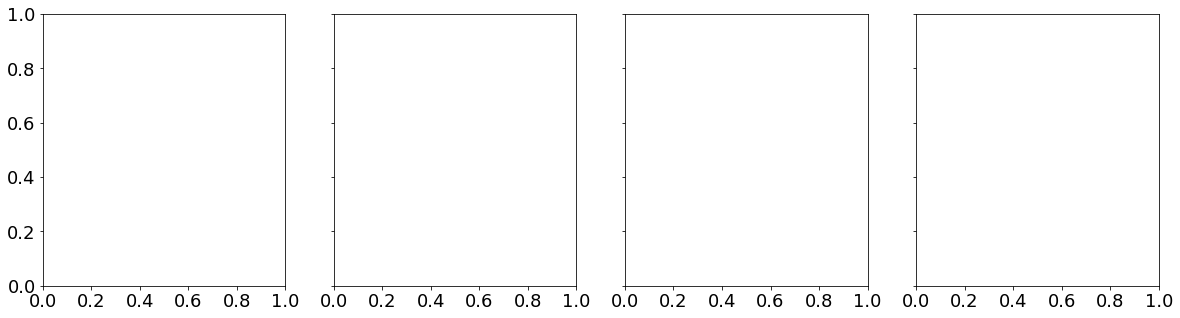

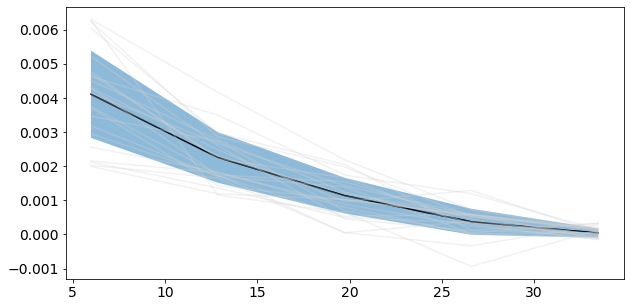

(5, 23) vals
KS test for m = 0


<Figure size 576x432 with 0 Axes>

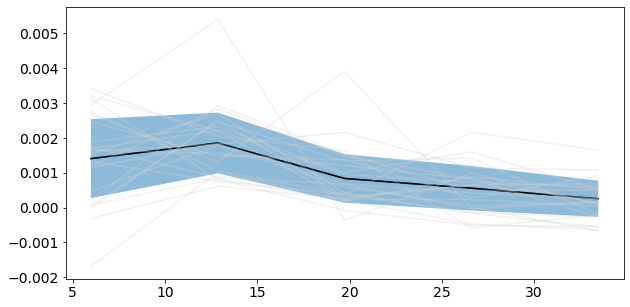

(5, 23) vals
KS test for m = 1


<Figure size 576x432 with 0 Axes>

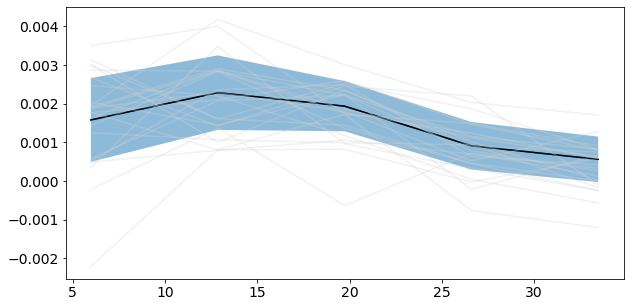

(5, 23) vals
KS test for m = 2


<Figure size 576x432 with 0 Axes>

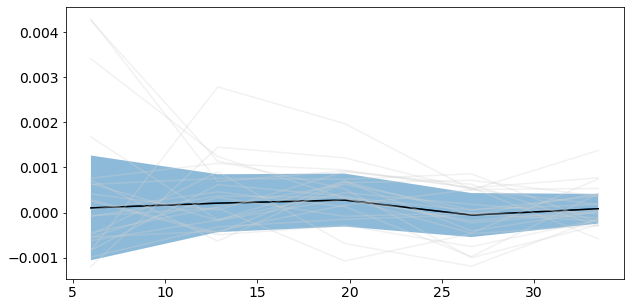

(5, 23) vals
KS test for m = 3


<Figure size 576x432 with 0 Axes>

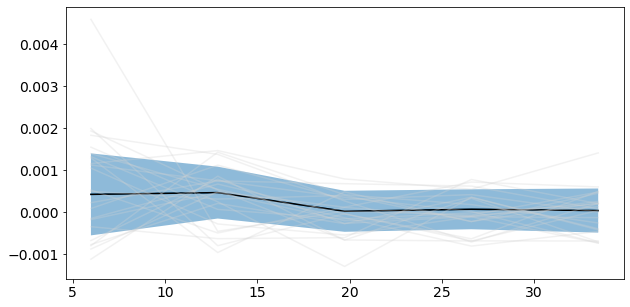

(5, 23) vals
KS test for m = 4
This many failures: 0
Lowest p value= 0.17332964814379548
retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/DES_maglim_z_0pt36_0pt53_redmapper_lambdagt20_combined_1493_1993Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_1443_2043Mpc_cc_24reg_m0to5_profiles.pkl
rvals [ 5.95505618 12.69662921 19.43820225 26.17977528 32.92134831]


<Figure size 576x432 with 0 Axes>

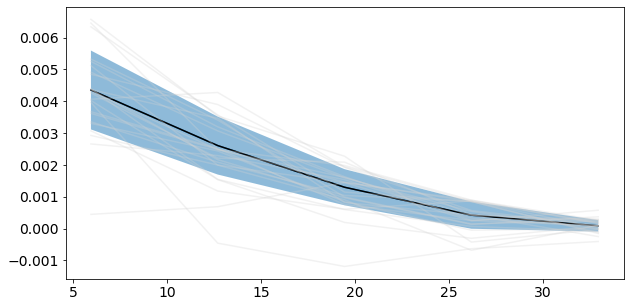

(5, 24) vals
KS test for m = 0


<Figure size 576x432 with 0 Axes>

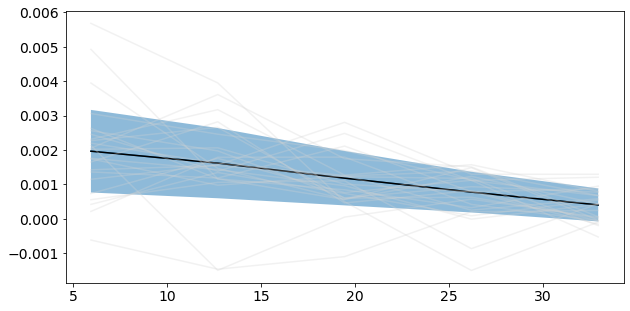

(5, 24) vals
KS test for m = 1


<Figure size 576x432 with 0 Axes>

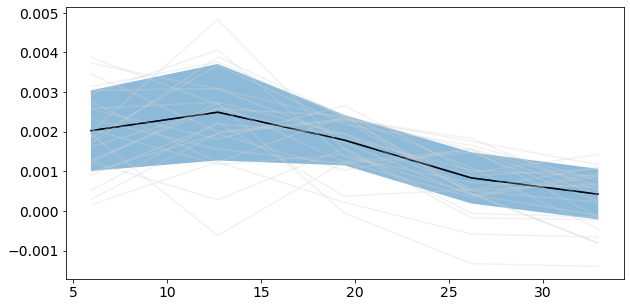

(5, 24) vals
KS test for m = 2


<Figure size 576x432 with 0 Axes>

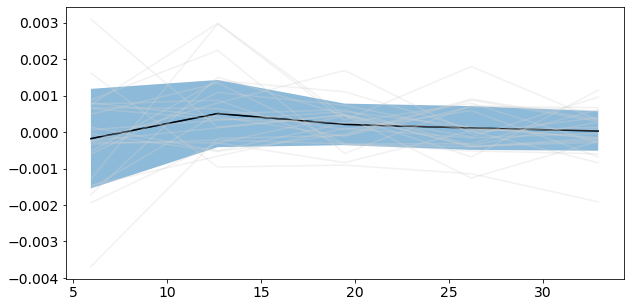

(5, 24) vals
KS test for m = 3


<Figure size 576x432 with 0 Axes>

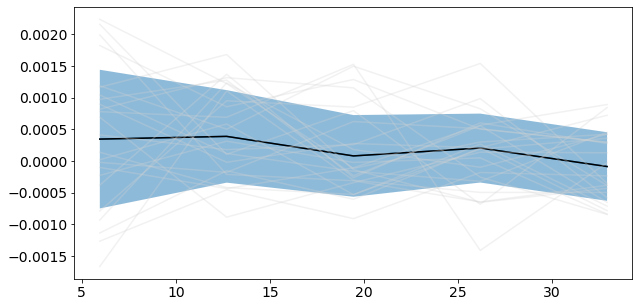

(5, 24) vals
KS test for m = 4
This many failures: 0
Lowest p value= 0.21705383971791048
retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/DES_maglim_z_0pt53_0pt72_redmapper_lambdagt20_combined_2093_2593Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_2043_2643Mpc_cc_24reg_m0to5_profiles.pkl
rvals [ 6.09375 12.96875 19.84375 26.71875 33.59375]


<Figure size 576x432 with 0 Axes>

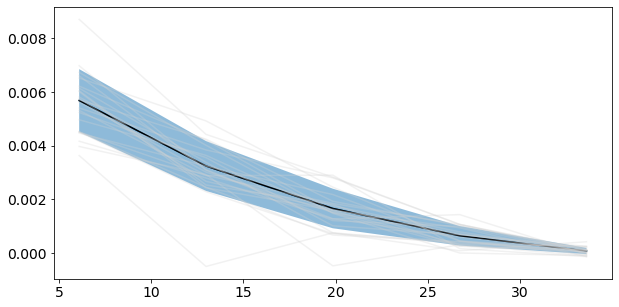

(5, 24) vals
KS test for m = 0


<Figure size 576x432 with 0 Axes>

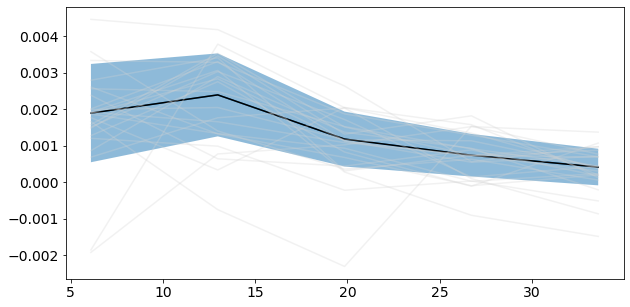

(5, 24) vals
KS test for m = 1


<Figure size 576x432 with 0 Axes>

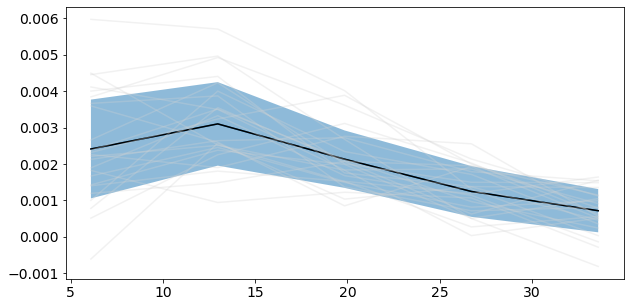

(5, 24) vals
KS test for m = 2


<Figure size 576x432 with 0 Axes>

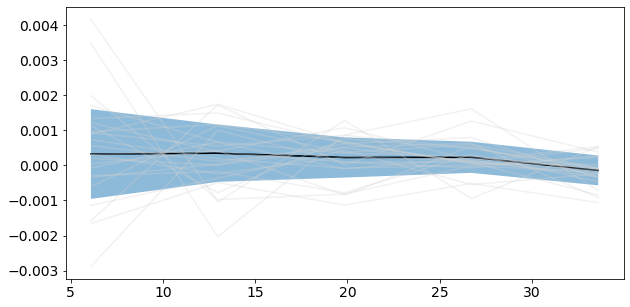

(5, 24) vals
KS test for m = 3


<Figure size 576x432 with 0 Axes>

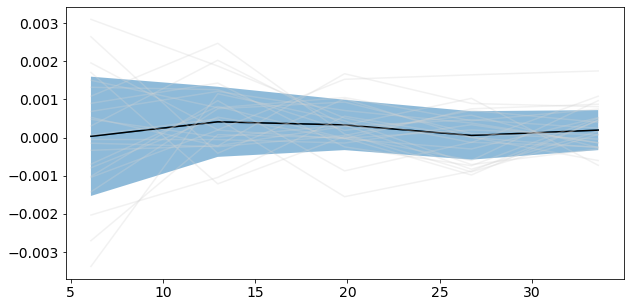

(5, 24) vals
KS test for m = 4
This many failures: 0
Lowest p value= 0.2983537765234964
retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/DES_maglim_z_0pt72_0pt94_redmapper_lambdagt20_combined_2693_3193Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_2643_3243Mpc_cc_24reg_m0to5_profiles.pkl
rvals [ 6.  12.8 19.6 26.4 33.2]


<Figure size 576x432 with 0 Axes>

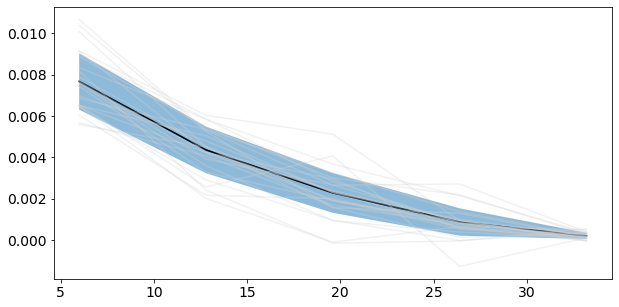

(5, 24) vals
KS test for m = 0


<Figure size 576x432 with 0 Axes>

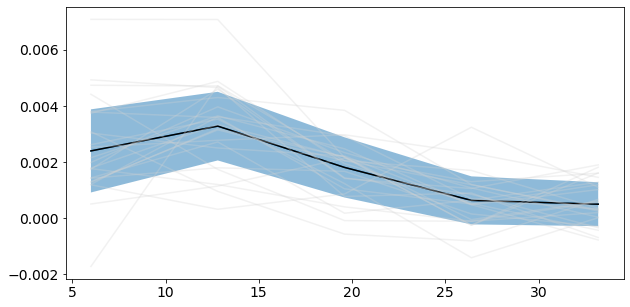

(5, 24) vals
KS test for m = 1


<Figure size 576x432 with 0 Axes>

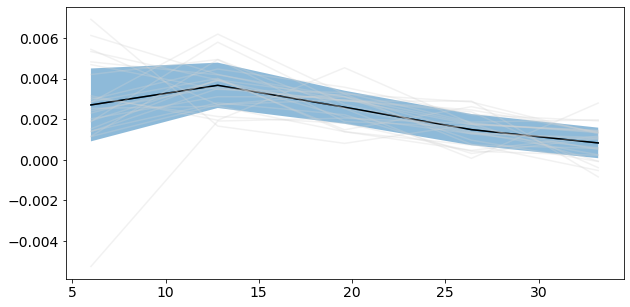

(5, 24) vals
KS test for m = 2


<Figure size 576x432 with 0 Axes>

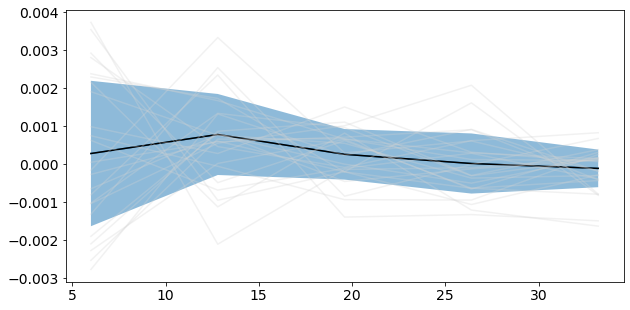

(5, 24) vals
KS test for m = 3


<Figure size 576x432 with 0 Axes>

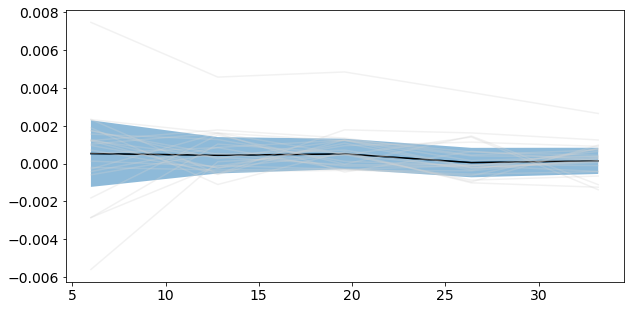

(5, 24) vals
KS test for m = 4
This many failures: 0
Lowest p value= 0.16877117543575948


Text(0.05, 0.5, 'Galaxies')

<Figure size 576x432 with 0 Axes>

In [36]:
# Making sure errors make sense
plot=True
if plot:
    # set up plot with four columns
    fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
for c, cl_dbin in enumerate(dbins):
    
    mapstr = f'DES_maglim_z_{zbins[c]}'
    des, (zlow,zhi) = cpp.retrieve_stack_info(dir, mapstr, pt_selection_str, cl_dbin, remove_r30=True)
    
    mlen = des.profile_splits.shape[0]
    pval= np.zeros((len(des.r_binned),mlen))
    ks = np.zeros((len(des.r_binned),mlen))
    same = len(des.r_binned) * [mlen*[False]]
    print(f"rvals {des.r_binned}")
    plt.rcParams.update({'font.size': 14})
    for m in range(mlen):
        fig2, axs2 = plt.subplots(1, 1, figsize=(10, 5))
        axs2.plot(des.r_binned, des.avg_profiles_binned[m], label=f"m={m}")
        axs2.fill_between(des.r_binned, des.avg_profiles_binned[m]-des.errors_binned[m]*np.sqrt(des.Nsamples), des.avg_profiles_binned[m]+des.errors_binned[m]*np.sqrt(des.Nsamples), alpha=0.5)
        # plot the mean
        axs2.plot(des.r_binned, des.avg_profiles_binned[m], label=f"m={m}", color='black')
        vals = np.zeros((len(des.r_binned),des.Nsamples))
        
        vals = np.zeros((len(des.r_binned),des.Nsamples))
        for i, reg in enumerate(range(des.Nsamples)):
            vals[:,i] = des.profile_splits_binned[m][reg]
            axs2.plot(des.r_binned, des.profile_splits_binned[m][reg], alpha=0.3, color='lightgrey')
        # show axs2
        plt.show()
        plt.clf()        
        print(vals.shape, 'vals')    
        print(f"KS test for m = {m}")
        for r in range(len(des.r_binned)):
            ks[r,m], pval[r,m], same[r][m] = st.KStest_raderrs(vals[r,:],des.errors_binned[m][r]*np.sqrt(des.Nsamples),des.avg_profiles_binned[m][r])
        #     print(f"Distrib is same? {pval[r,m]} means {same[r][m]} for {des.r_binned[r]}")
        # print(f"---------")

    pval = np.transpose(np.asarray(pval))
    print("This many failures:", np.sum(pval<0.05))
    print("Lowest p value=", np.min(pval))
    if plot:
        scmap = st.shiftedColorMap(plt.cm.RdBu, midpoint=0.05, name='shifted')
        pval_plot = axs[c].imshow(pval, cmap=scmap, vmin=0, vmax=1)
        axs[0].set_ylabel("m")
        axs[c].set_title(f"z = {np.round(zlow.value,2)} - {np.round(zhi.value,2)}")
        # replace x ticks with r values
        # axs[c].set_xticks(np.arange(0, len(des.r_binned), 1), np.round(des.r_binned,1))
        # remove x tick labels
        axs[c].set_xticklabels([])
        # axs[c].set_xlabel("r [Mpc]")        
        # add an axis for a colorbar
    running_list.append(pval)
fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
# add the space for a colorbar, keep it empty
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
# make sure this axes is empty
cbar_ax.axis('off')
# fig.colorbar(pval_plot, cax=cbar_ax, label="p-value")
# make space for label on the left of the plot
plt.subplots_adjust(left=0.09)
# add label on the left, rotated
fig.text(0.05, 0.5, 'Galaxies', va='center', rotation='vertical', fontsize=20, fontweight='bold')


# plt.savefig("/home/mlokken/oriented_stacking/plots/paper2/ks_test_Gaussian_galaxies.pdf")
# plt.show()


Text(0, 0.5, 'Counts')

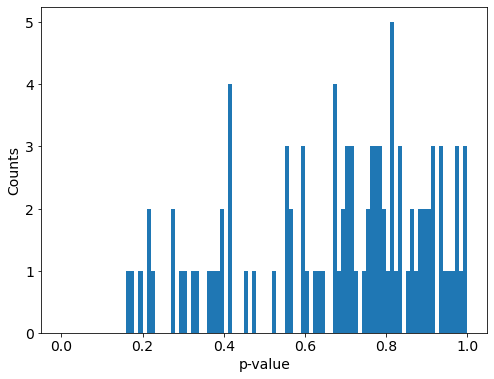

In [37]:
# plot the distribution of p for all three tracers
# should match a uniform distribution
plt.hist(np.asarray(running_list).flatten(), bins=100, range=(0,1))
plt.xlabel("p-value")
plt.ylabel("Counts")

In [38]:
plt.rcParams.update({'font.size': 18})

retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/ilc_SZ_yy_4096_hpx_redmapper_lambdagt20_combined_893_1393Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_843_1443Mpc_cc_24reg_m0to5_profiles.pkl
rvals [ 5.97938144 12.85223368 19.72508591 26.59793814 33.47079038]


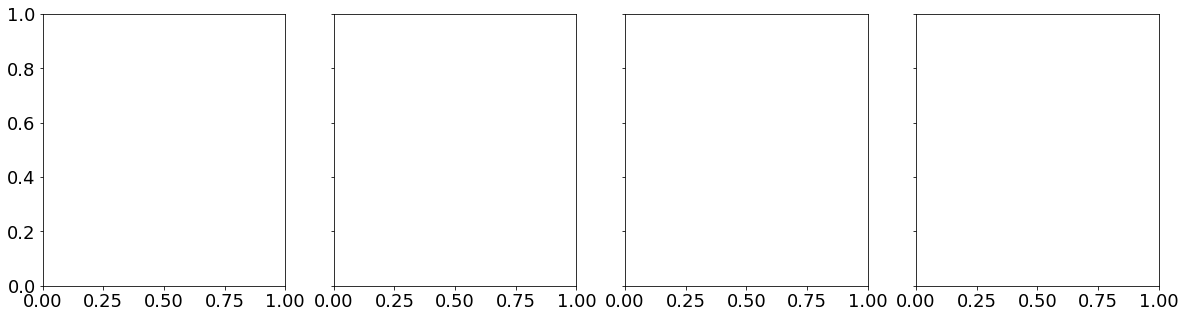

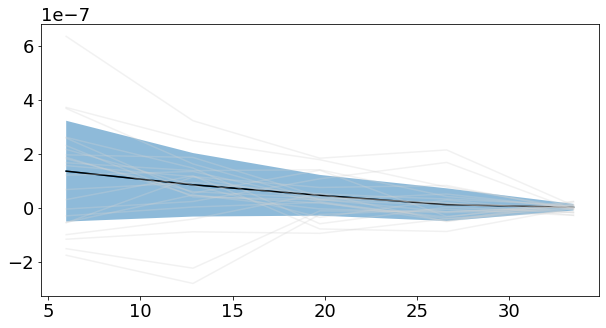

KS test for m = 0


<Figure size 576x432 with 0 Axes>

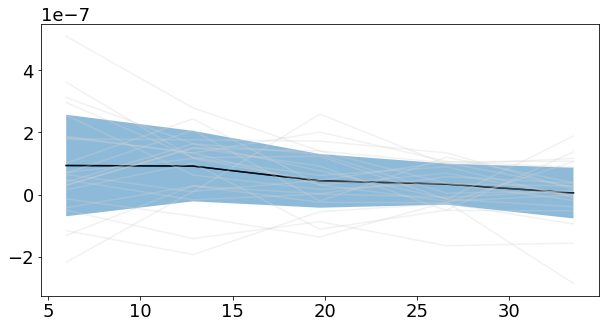

KS test for m = 1


<Figure size 576x432 with 0 Axes>

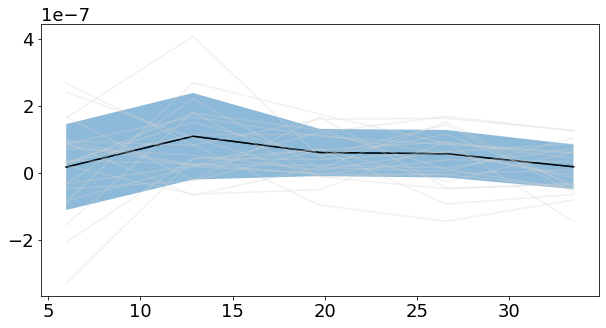

KS test for m = 2


<Figure size 576x432 with 0 Axes>

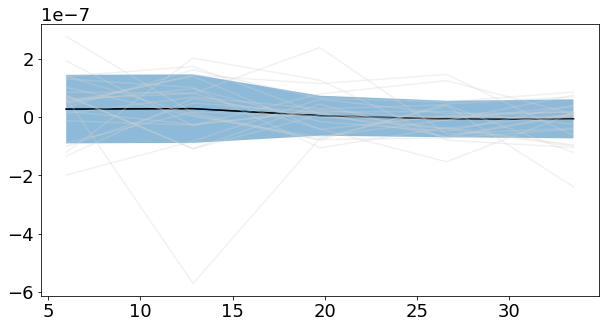

KS test for m = 3


<Figure size 576x432 with 0 Axes>

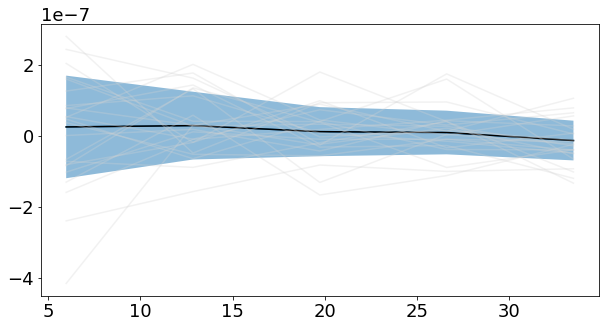

KS test for m = 4
This many failures: 0
retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/ilc_SZ_yy_4096_hpx_redmapper_lambdagt20_combined_1493_1993Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_1443_2043Mpc_cc_24reg_m0to5_profiles.pkl
rvals [ 5.95505618 12.69662921 19.43820225 26.17977528 32.92134831]


<Figure size 576x432 with 0 Axes>

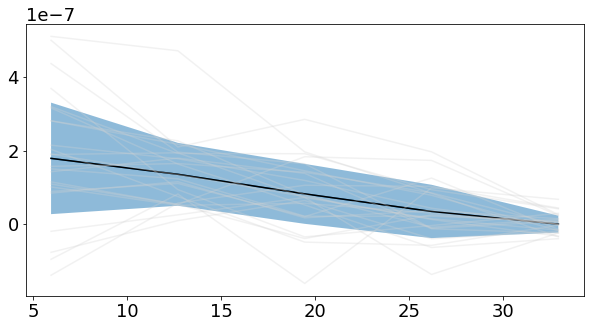

KS test for m = 0


<Figure size 576x432 with 0 Axes>

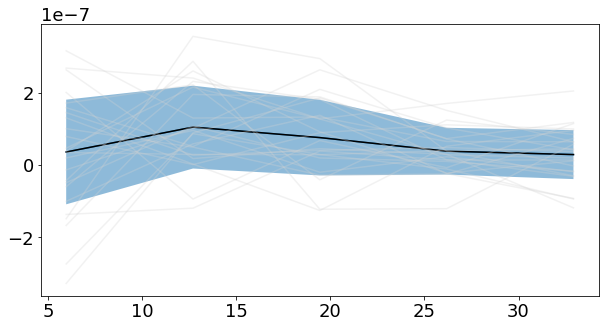

KS test for m = 1


<Figure size 576x432 with 0 Axes>

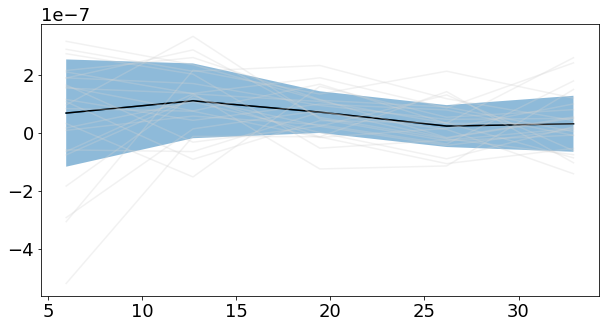

KS test for m = 2


<Figure size 576x432 with 0 Axes>

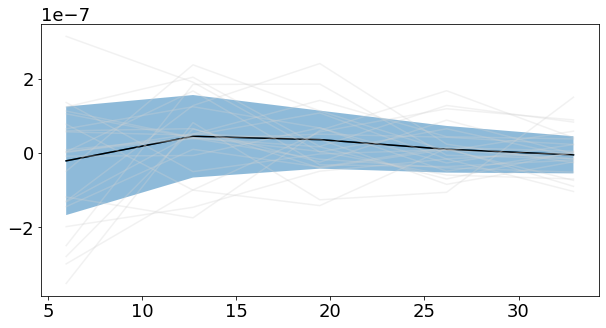

KS test for m = 3


<Figure size 576x432 with 0 Axes>

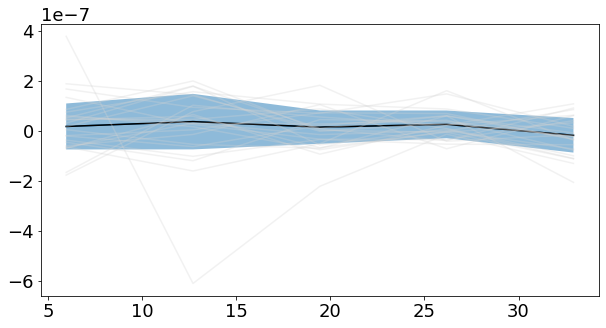

KS test for m = 4
This many failures: 0
retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/ilc_SZ_yy_4096_hpx_redmapper_lambdagt20_combined_2093_2593Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_2043_2643Mpc_cc_24reg_m0to5_profiles.pkl
rvals [ 6.09375 12.96875 19.84375 26.71875 33.59375]


<Figure size 576x432 with 0 Axes>

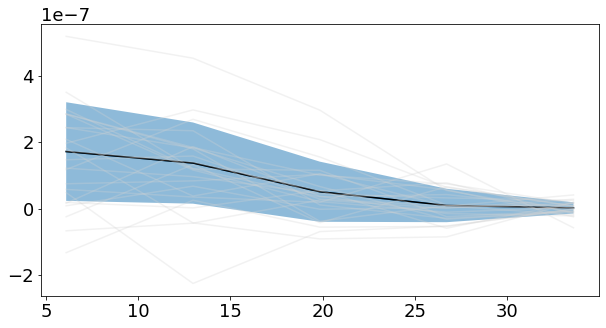

KS test for m = 0


<Figure size 576x432 with 0 Axes>

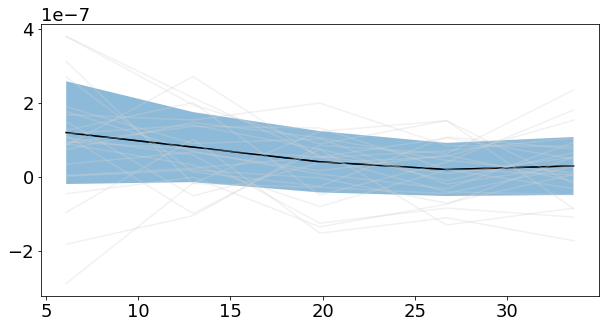

KS test for m = 1


<Figure size 576x432 with 0 Axes>

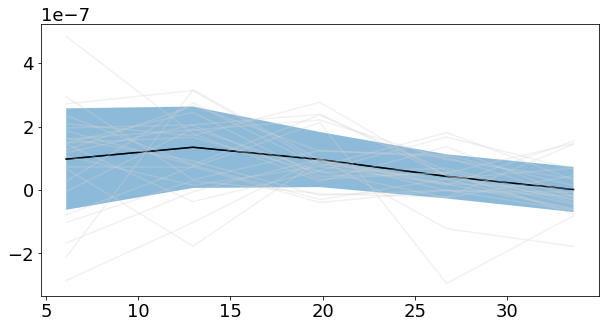

KS test for m = 2


<Figure size 576x432 with 0 Axes>

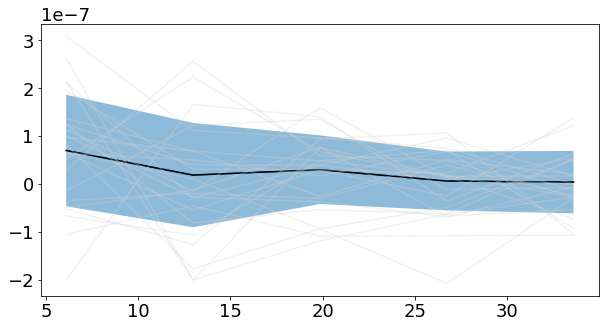

KS test for m = 3


<Figure size 576x432 with 0 Axes>

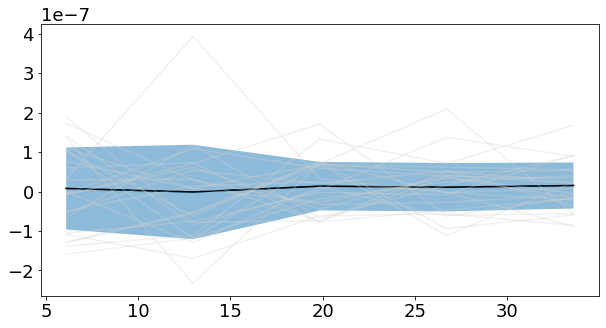

KS test for m = 4
This many failures: 0
retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/ilc_SZ_yy_4096_hpx_redmapper_lambdagt20_combined_2693_3193Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_2643_3243Mpc_cc_24reg_m0to5_profiles.pkl
rvals [ 6.  12.8 19.6 26.4 33.2]


<Figure size 576x432 with 0 Axes>

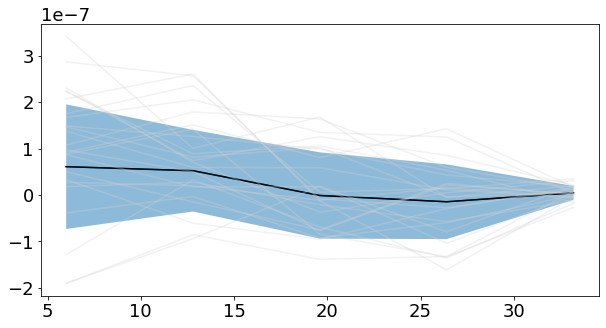

KS test for m = 0


<Figure size 576x432 with 0 Axes>

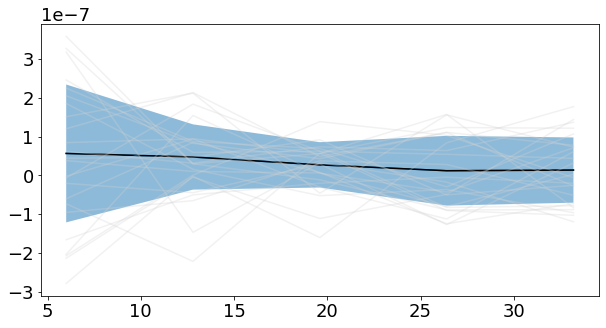

KS test for m = 1


<Figure size 576x432 with 0 Axes>

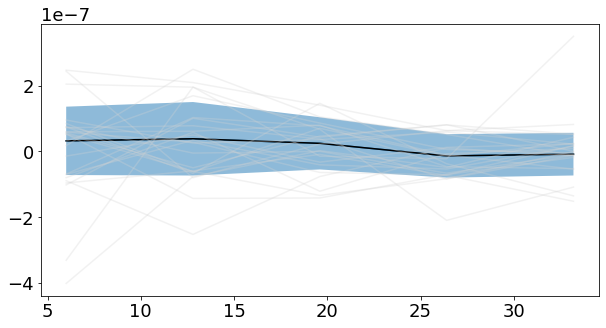

KS test for m = 2


<Figure size 576x432 with 0 Axes>

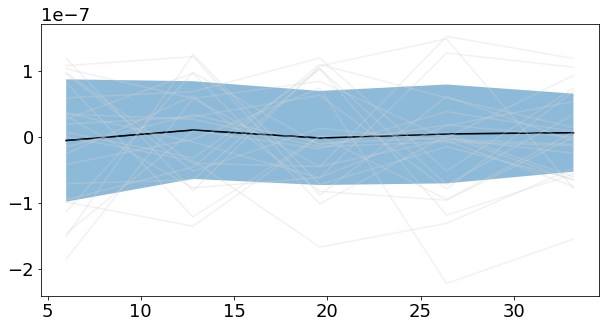

KS test for m = 3


<Figure size 576x432 with 0 Axes>

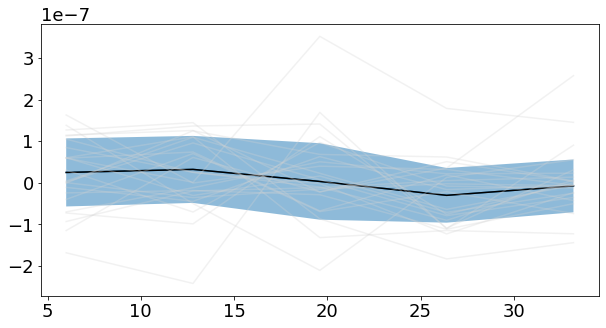

KS test for m = 4
This many failures: 0


Text(0.05, 0.5, 'tSZ')

<Figure size 576x432 with 0 Axes>

In [39]:
# Making sure errors make sense
plot=True


fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

for c, cl_dbin in enumerate(dbins):
    cl_dlow, cl_dhi = cl_dbin[0], cl_dbin[1]
    dlow   = cl_dlow-50
    dhi    = cl_dhi+50
    zlow   = z_at_value(cosmo.comoving_distance, cl_dlow*u.Mpc)
    zhi    = z_at_value(cosmo.comoving_distance, cl_dhi*u.Mpc)
    mapstr = f'ilc_SZ_yy_4096_hpx'
    act, (zlow,zhi) = cpp.retrieve_stack_info(dir, mapstr, pt_selection_str, cl_dbin, remove_r30=True)
    mlen = act.profile_splits.shape[0]
    pval= np.zeros((len(act.r_binned),mlen))
    ks = np.zeros((len(act.r_binned),mlen))
    same = len(act.r_binned) * [mlen*[False]]
    print(f"rvals {act.r_binned}")
    for m in range(5):
        fig2, axs2 = plt.subplots(1, 1, figsize=(10, 5))
        axs2.plot(act.r_binned, act.avg_profiles_binned[m], label=f"m={m}")
        axs2.fill_between(act.r_binned, act.avg_profiles_binned[m]-act.errors_binned[m]*np.sqrt(act.Nsamples), act.avg_profiles_binned[m]+act.errors_binned[m]*np.sqrt(act.Nsamples), alpha=0.5)
        # plot the mean
        axs2.plot(act.r_binned, act.avg_profiles_binned[m], label=f"m={m}", color='black')
        vals = np.zeros((len(act.r_binned),act.Nsamples))
        
        vals = np.zeros((len(act.r_binned),act.Nsamples))
        for i, reg in enumerate(range(act.Nsamples)):

            vals[:,i] = act.profile_splits_binned[m][reg]
            axs2.plot(act.r_binned, act.profile_splits_binned[m][reg], alpha=0.3, color='lightgrey')
        # show axs2
        plt.show()
        plt.clf()
        print(f"KS test for m = {m}")
        for r in range(len(act.r_binned)):
            ks[r,m], pval[r,m], same[r][m] = st.KStest_raderrs(vals[r,:],act.errors_binned[m][r]*np.sqrt(act.Nsamples),act.avg_profiles_binned[m][r])
        #     print(f"Distrib is same? {same[r][m]} for {act.r_binned[r]}")
        # print(f"---------")

    pval = np.transpose(np.asarray(pval))
    
    print("This many failures:", np.sum(pval<0.05))

    if plot:
        scmap = st.shiftedColorMap(plt.cm.RdBu, midpoint=0.05, name='shifted')
        pval_plot = axs[c].imshow(pval, cmap=scmap, vmin=0, vmax=1)
        axs[0].set_ylabel("m")
        # axs[c].set_title(f"z = {np.round(zlow.value,2)} - {np.round(zhi.value,2)}")
        # replace x ticks with r values
        # axs[c].set_xticks(np.arange(0, len(act.r_binned), 1), np.round(act.r_binned,1))
        # axs[c].set_xlabel("r [Mpc]")
        axs[c].set_xticklabels([])
    running_list.append(pval)
# add an axis for a colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])

fig.colorbar(pval_plot, cax=cbar_ax, label="p-value", pad=0.00)
# make colorbar label larger
cbar_ax.yaxis.label.set_size(20)
# centered title
# make space for label on the left of the plot
plt.subplots_adjust(left=0.09)
# add label on the left, rotated
fig.text(0.05, 0.5, 'tSZ', va='center', rotation='vertical', fontsize=20, fontweight='bold')
# plt.savefig("/home/mlokken/oriented_stacking/plots/paper2/ks_test_Gaussian_tSZ.pdf")

# plt.show()



Text(0, 0.5, 'Counts')

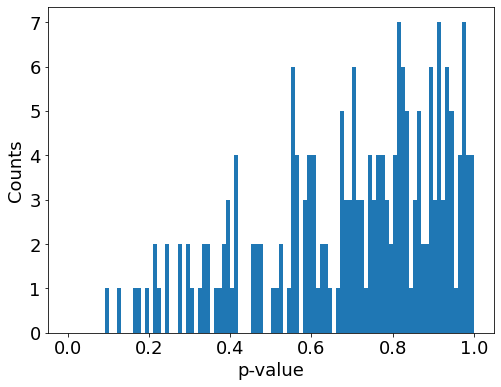

In [40]:
# plot the distribution of p for all three tracers
# should match a uniform distribution
plt.hist(np.asarray(running_list).flatten(), bins=100, range=(0,1))
plt.xlabel("p-value")
plt.ylabel("Counts")

In [41]:
plt.rcParams.update({'font.size': 18})

In [72]:
kappa_only = []
testp_kappa = []

retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/kappa_bin4_redmapper_lambdagt20_combined_893_1393Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_843_1443Mpc_cc_24reg_m0to5_profiles.pkl
rvals [ 5.97938144 12.85223368 19.72508591 26.59793814 33.47079038]


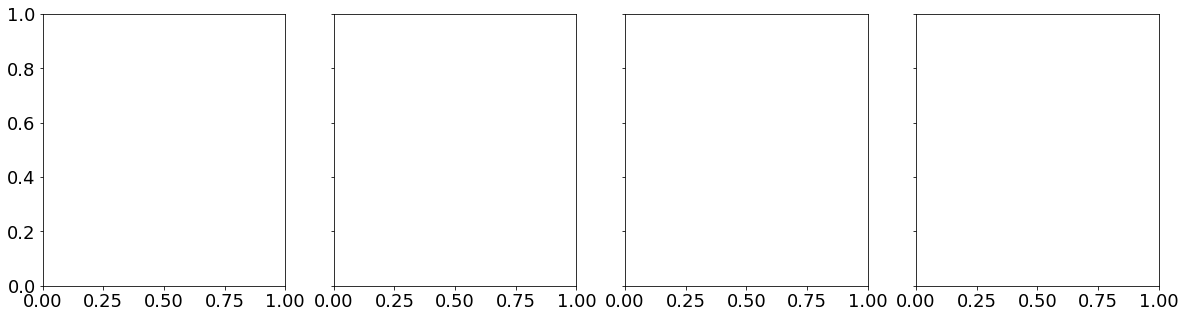

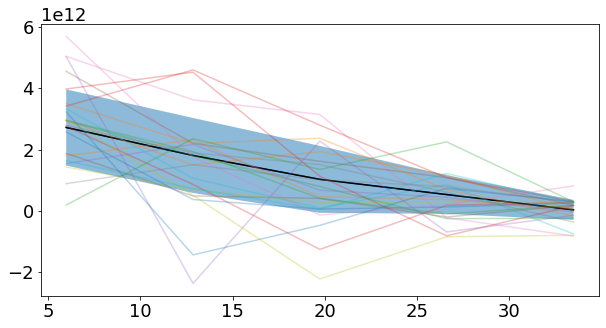

KS test for m = 0


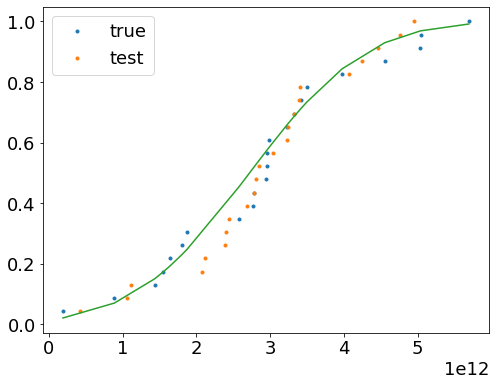

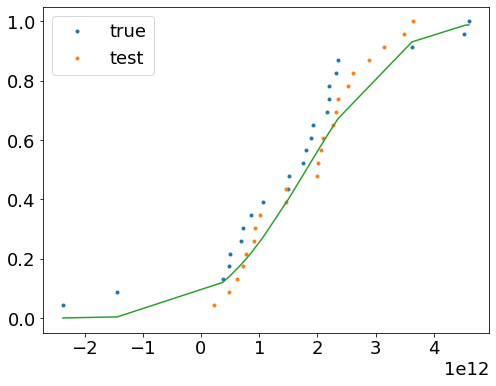

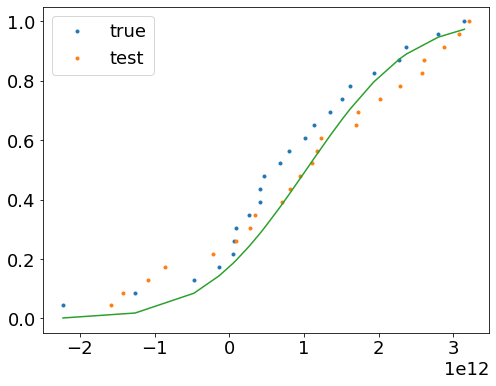

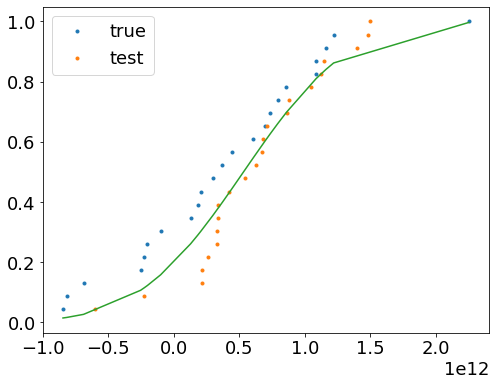

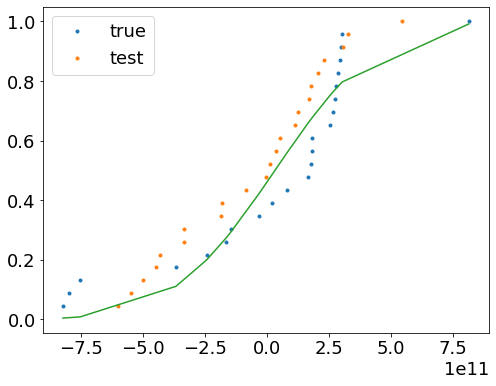

<Figure size 576x432 with 0 Axes>

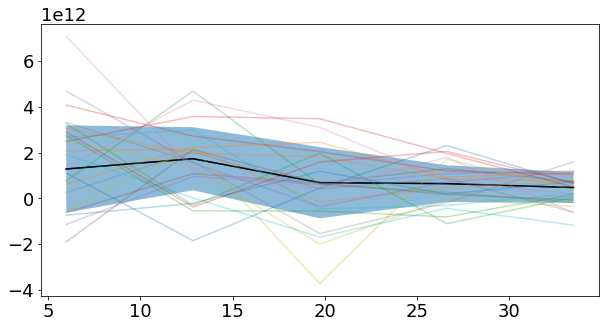

KS test for m = 1


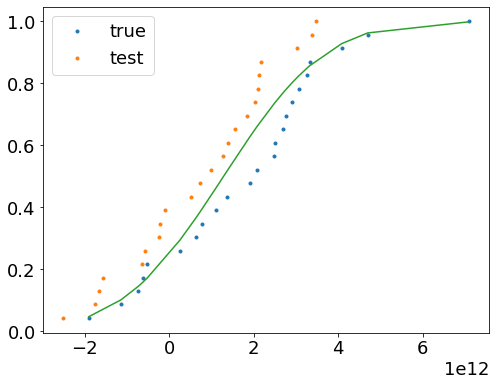

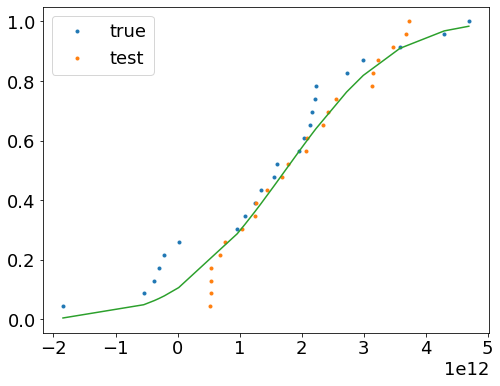

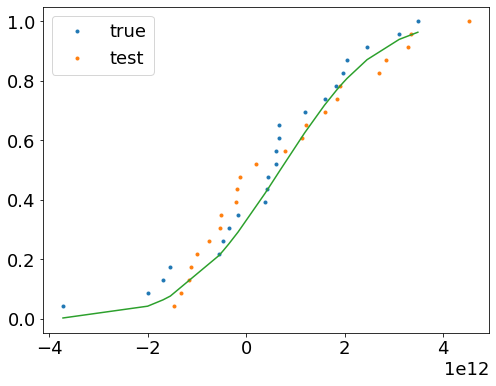

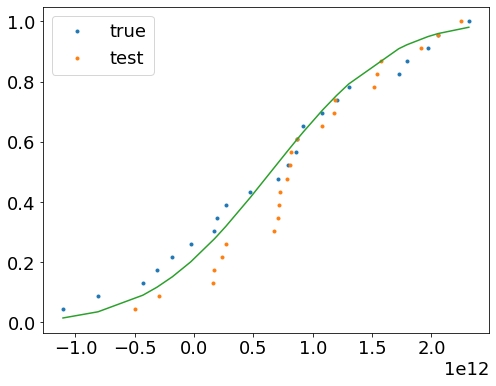

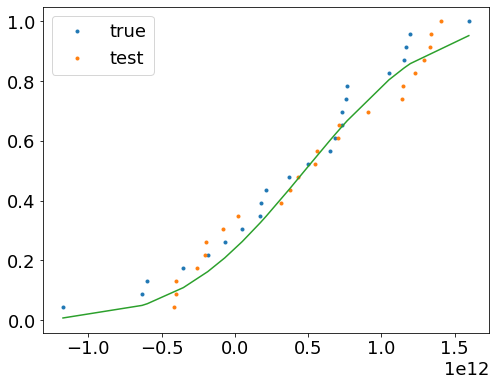

<Figure size 576x432 with 0 Axes>

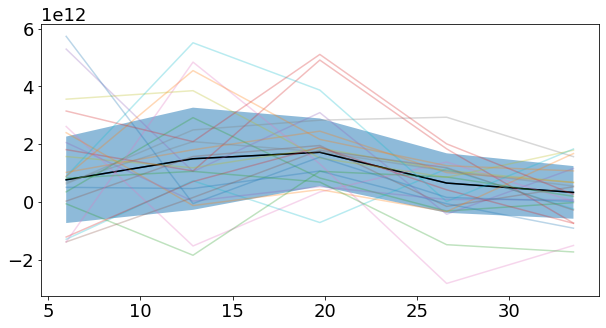

KS test for m = 2


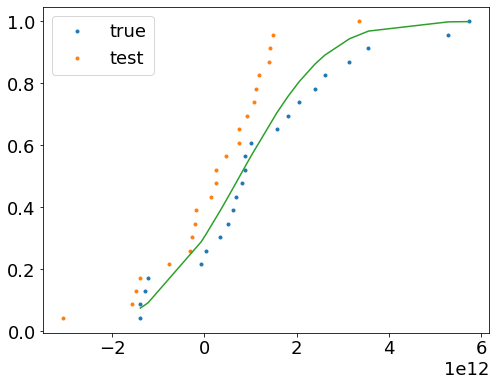

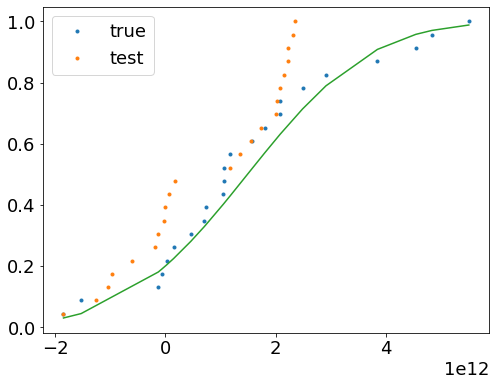

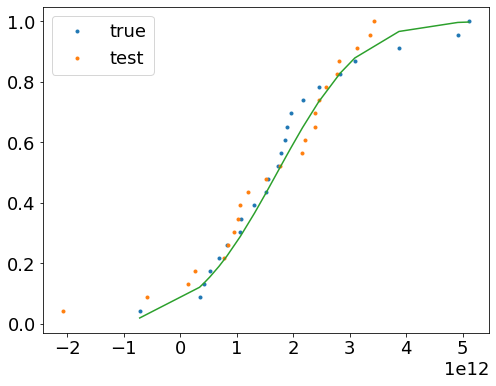

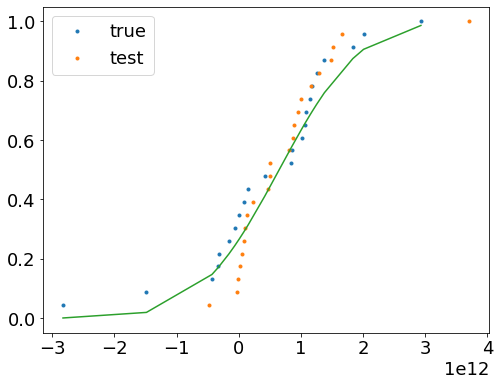

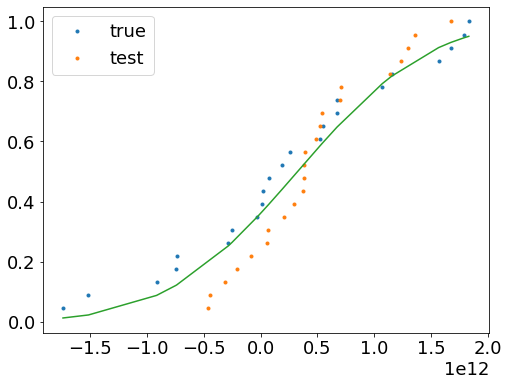

<Figure size 576x432 with 0 Axes>

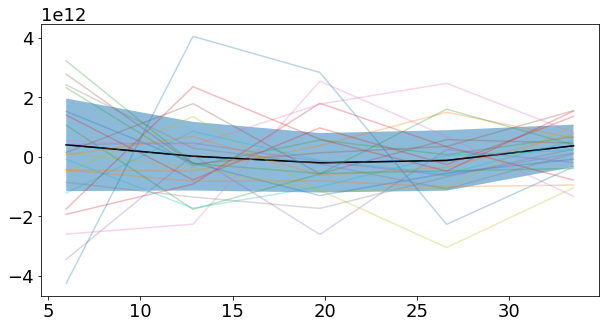

KS test for m = 3


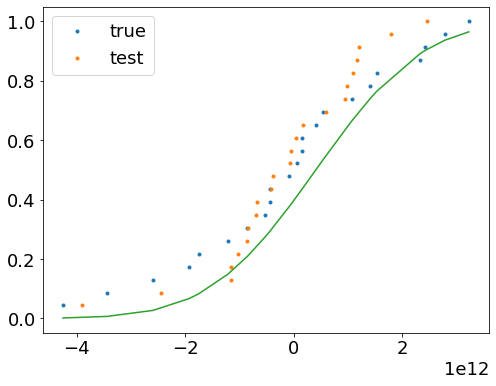

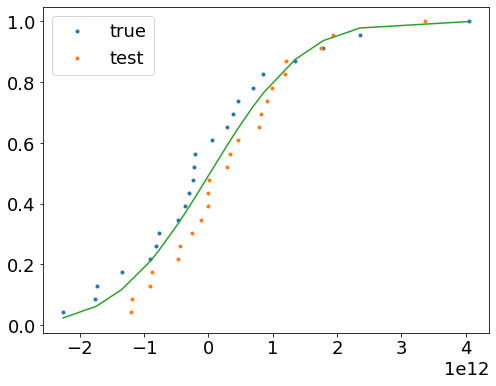

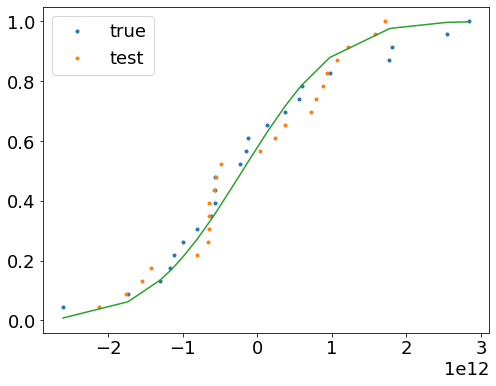

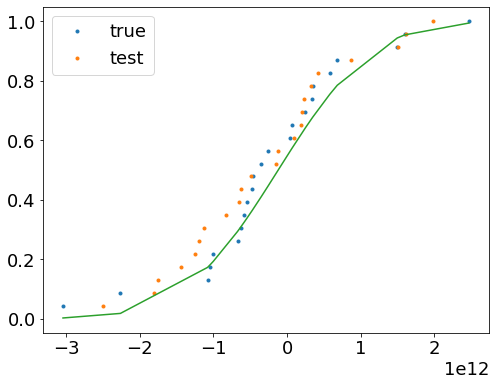

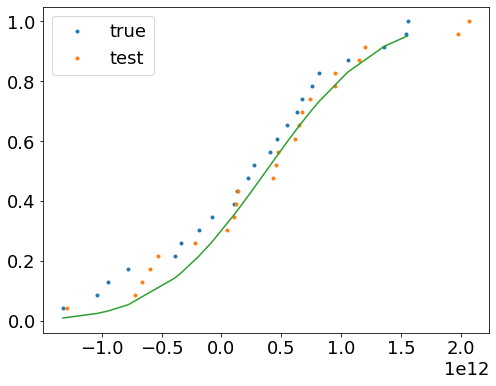

<Figure size 576x432 with 0 Axes>

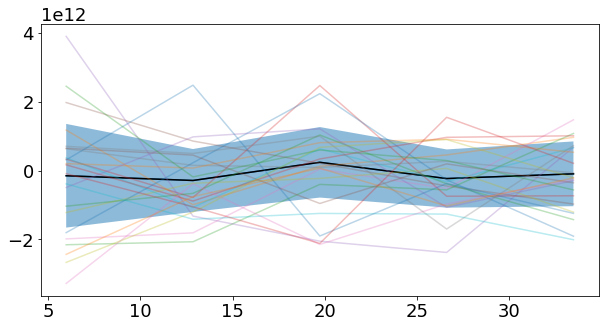

KS test for m = 4


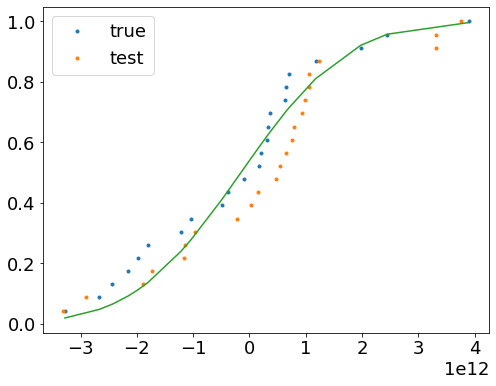

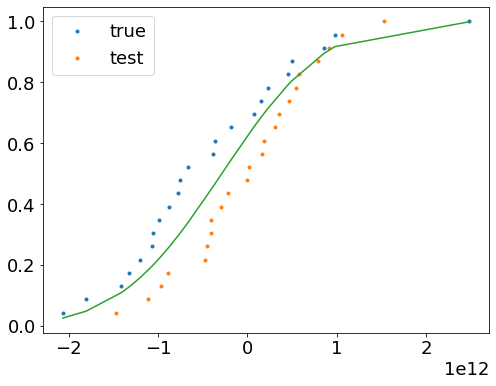

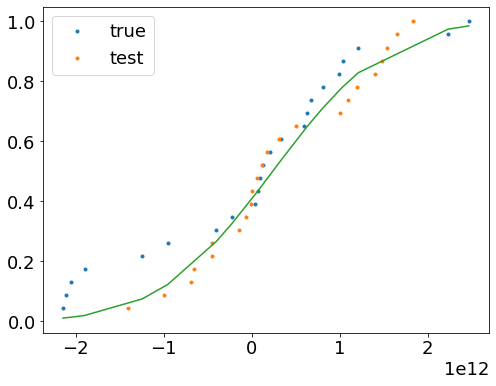

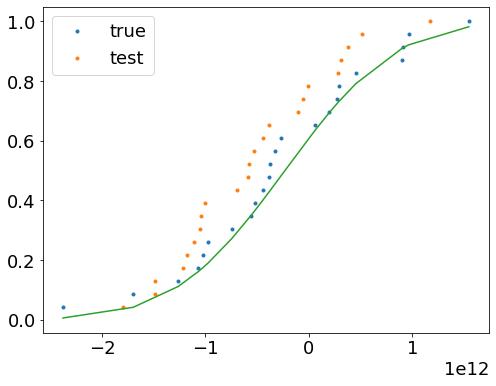

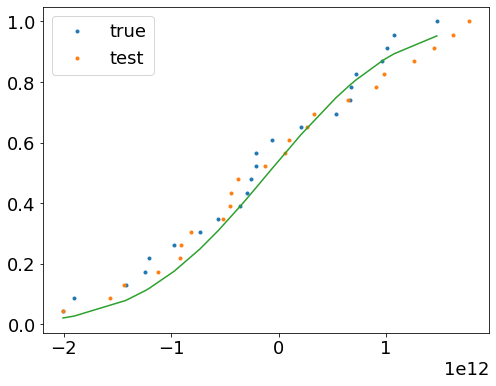

This many failures: 0
retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/kappa_bin4_redmapper_lambdagt20_combined_1493_1993Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_1443_2043Mpc_cc_24reg_m0to5_profiles.pkl
rvals [ 5.95505618 12.69662921 19.43820225 26.17977528 32.92134831]


<Figure size 576x432 with 0 Axes>

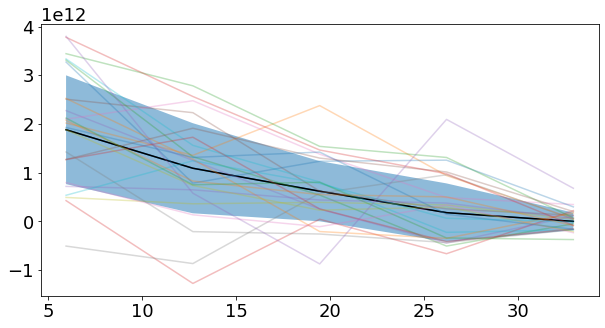

KS test for m = 0


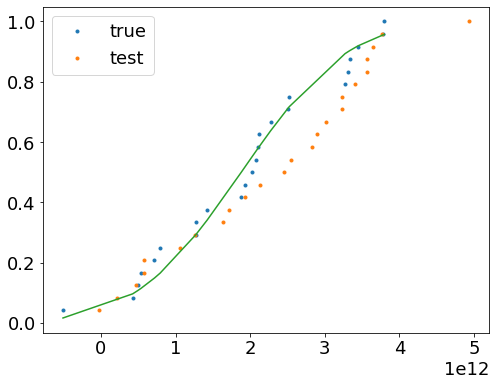

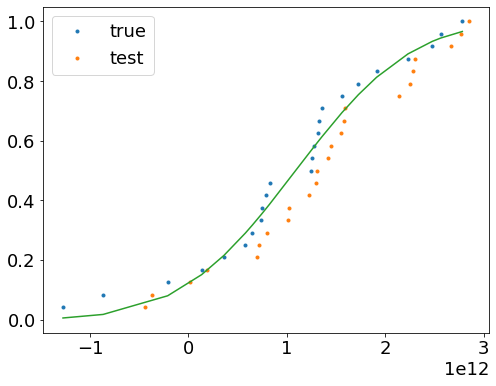

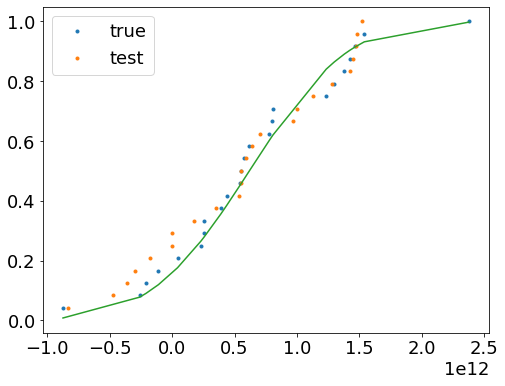

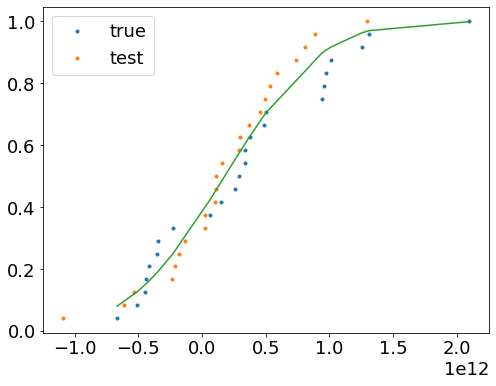

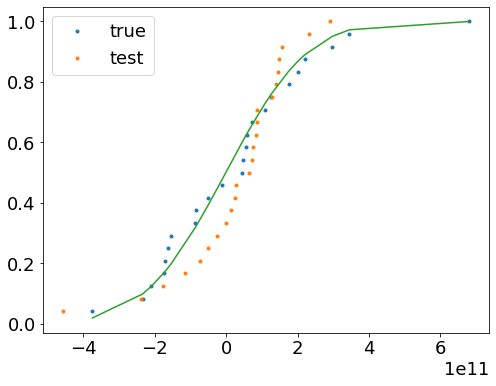

<Figure size 576x432 with 0 Axes>

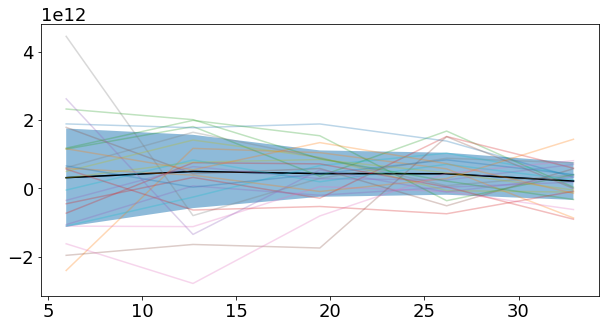

KS test for m = 1


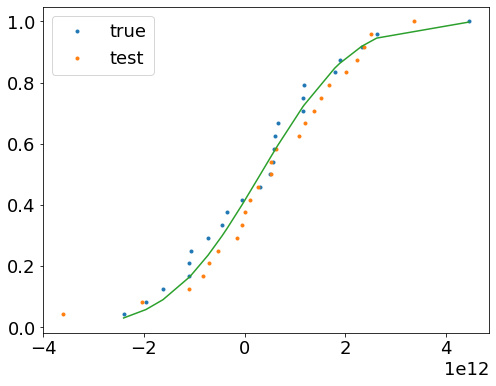

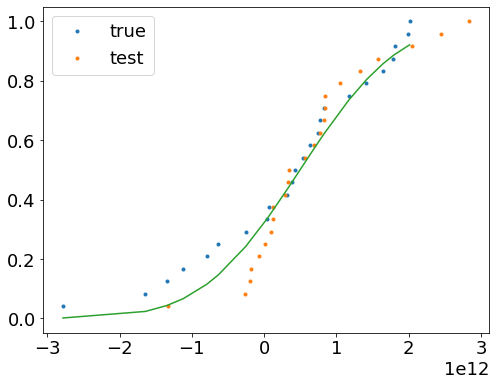

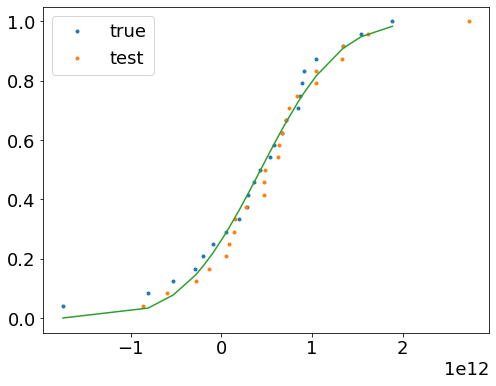

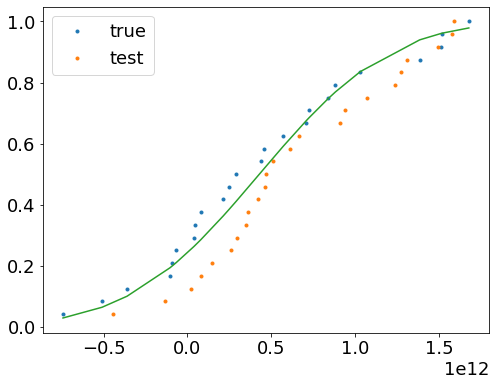

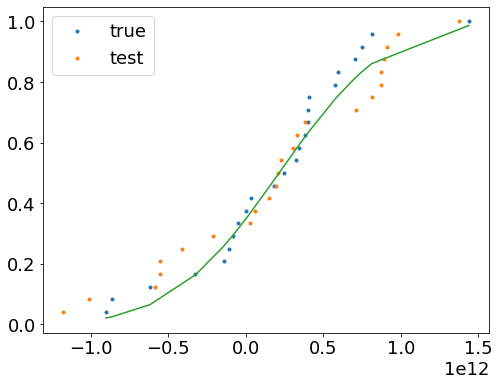

<Figure size 576x432 with 0 Axes>

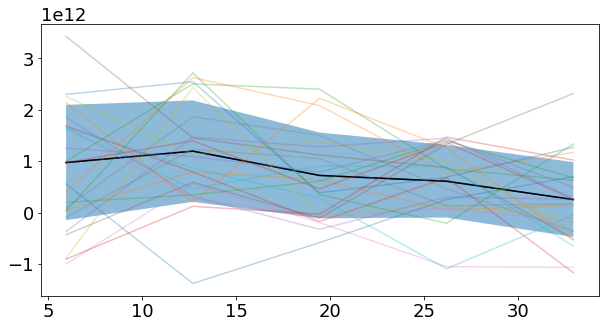

KS test for m = 2


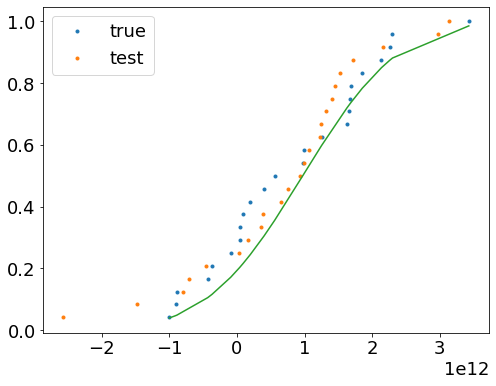

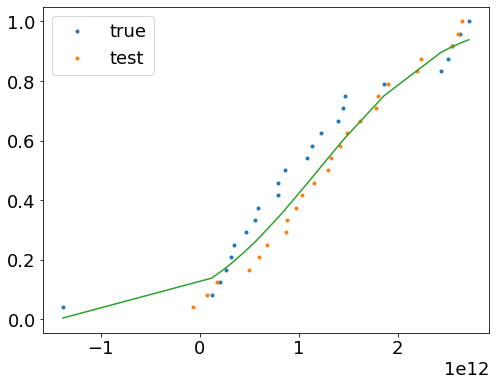

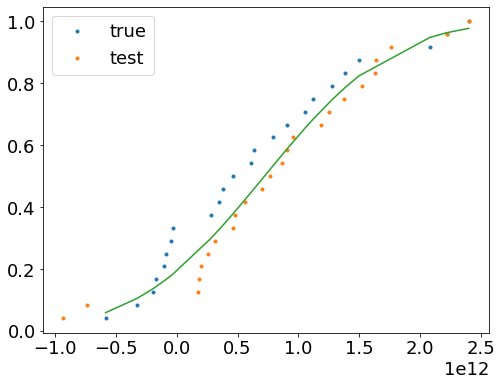

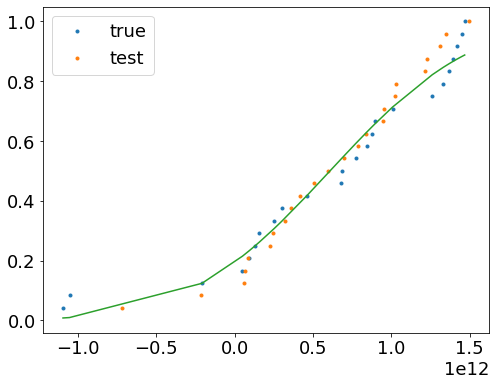

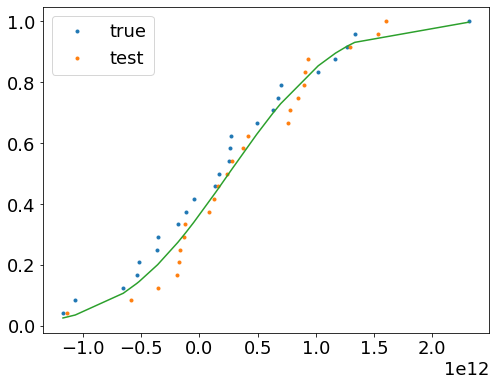

<Figure size 576x432 with 0 Axes>

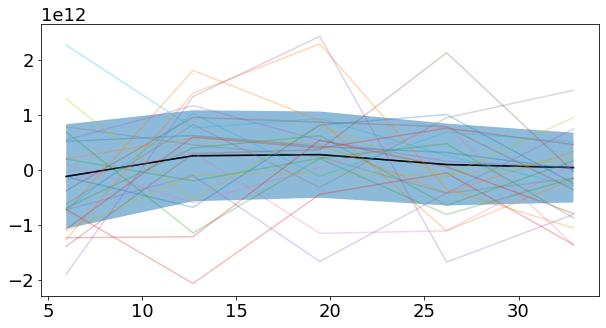

KS test for m = 3


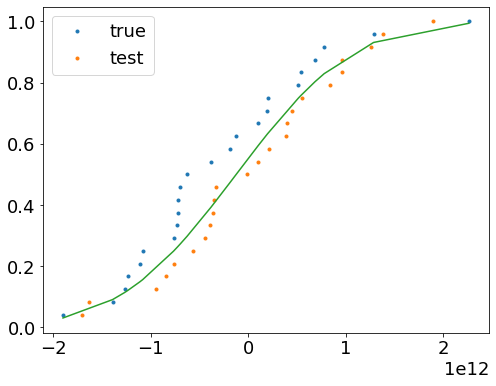

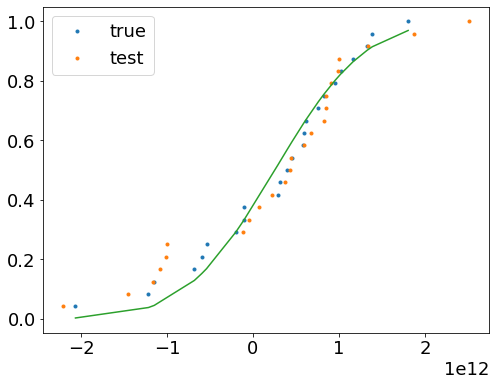

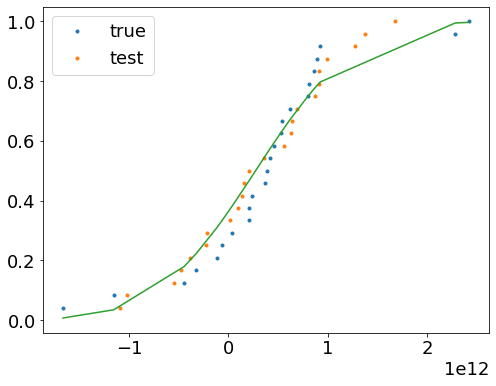

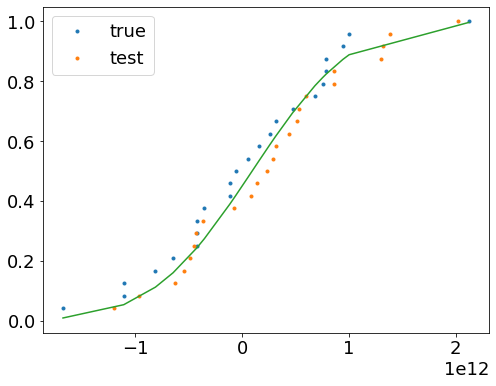

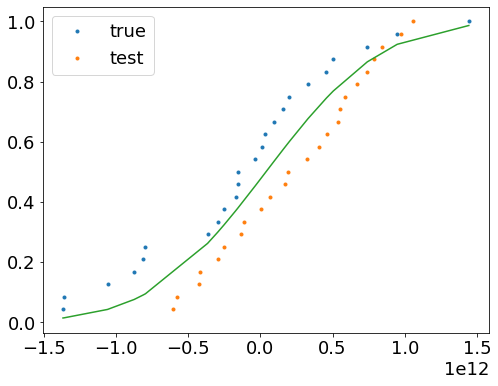

<Figure size 576x432 with 0 Axes>

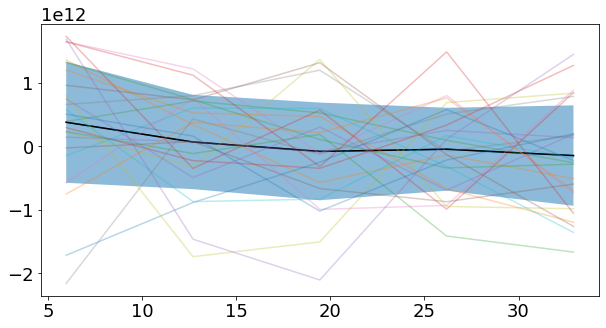

KS test for m = 4


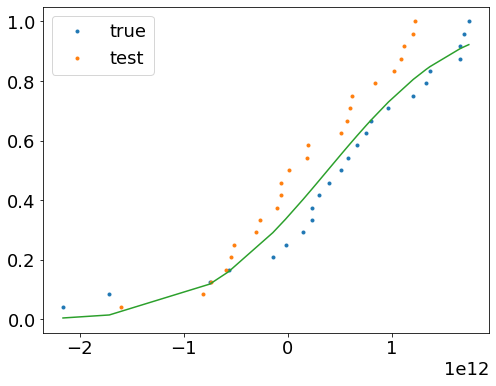

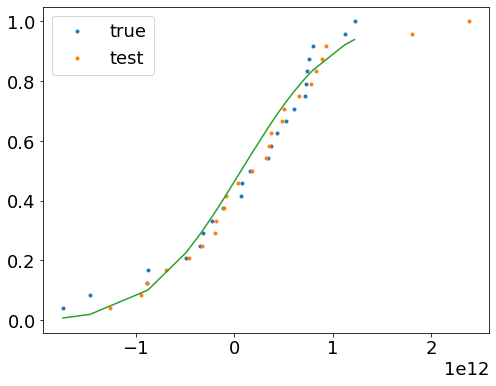

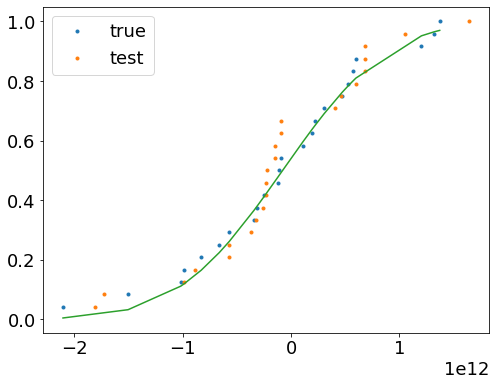

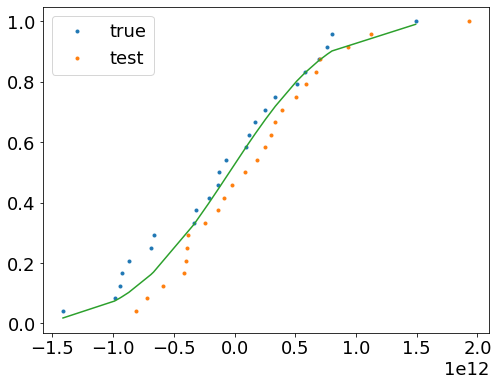

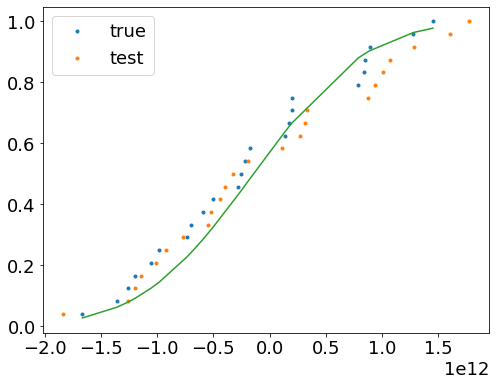

This many failures: 0
retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/kappa_bin4_redmapper_lambdagt20_combined_2093_2593Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_2043_2643Mpc_cc_24reg_m0to5_profiles.pkl
rvals [ 6.09375 12.96875 19.84375 26.71875 33.59375]


<Figure size 576x432 with 0 Axes>

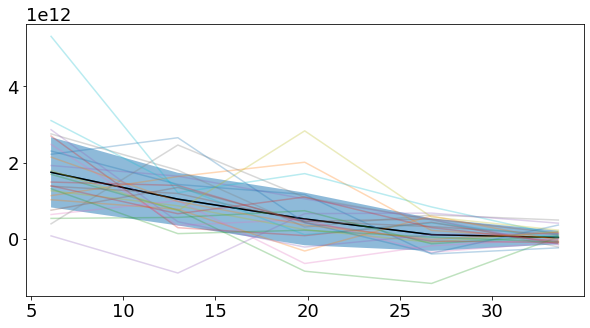

KS test for m = 0


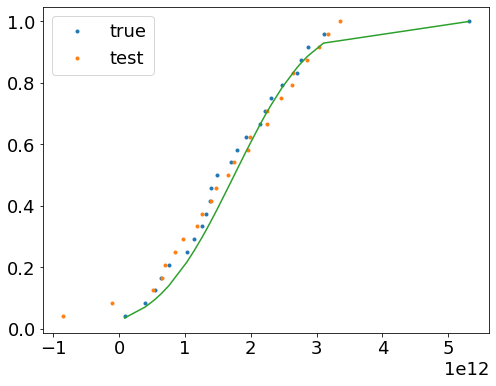

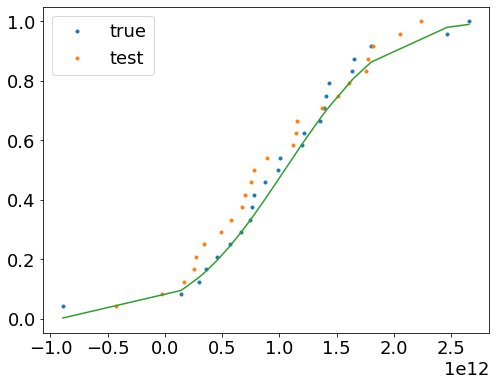

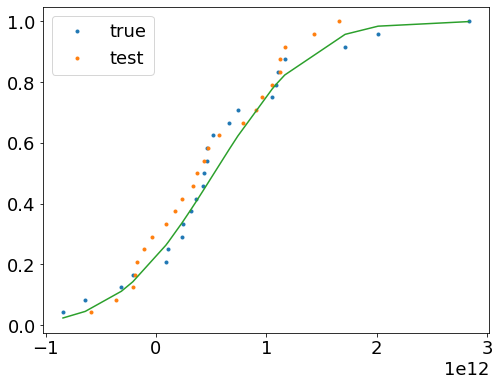

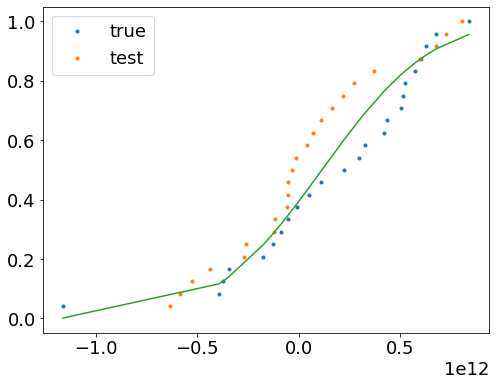

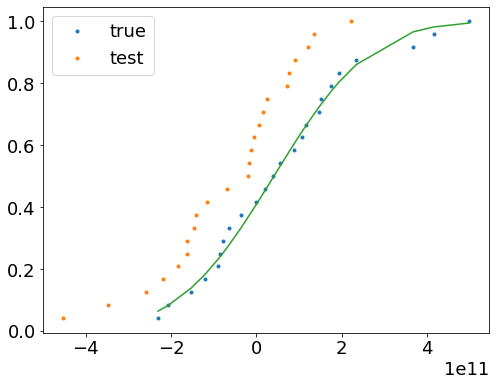

<Figure size 576x432 with 0 Axes>

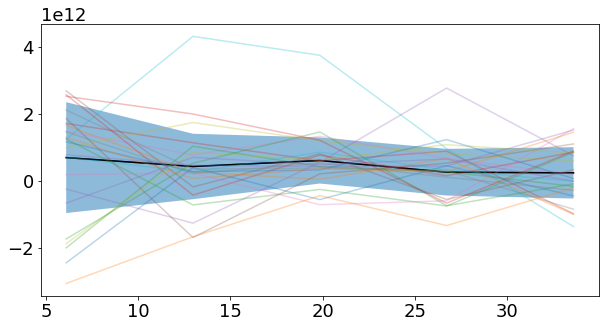

KS test for m = 1


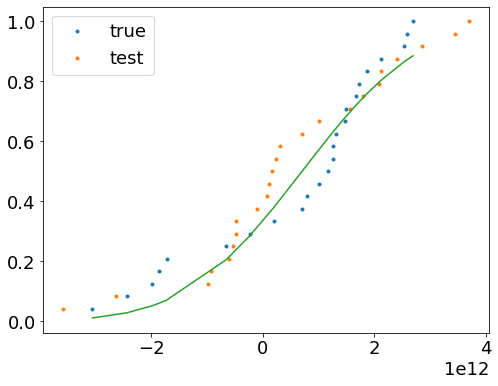

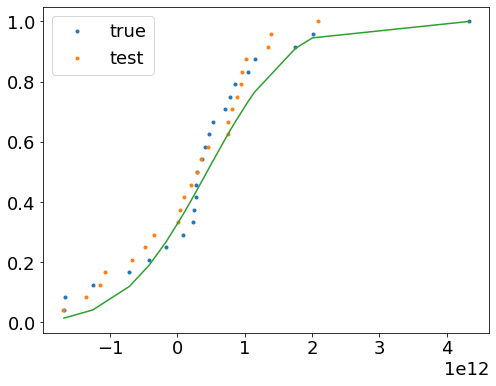

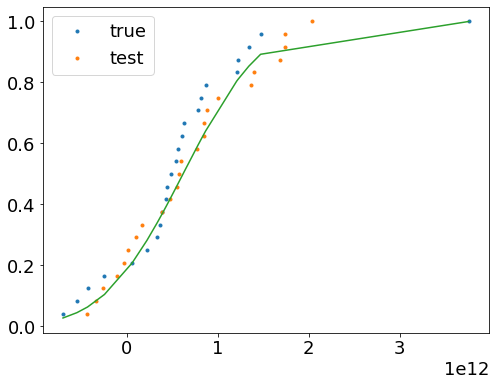

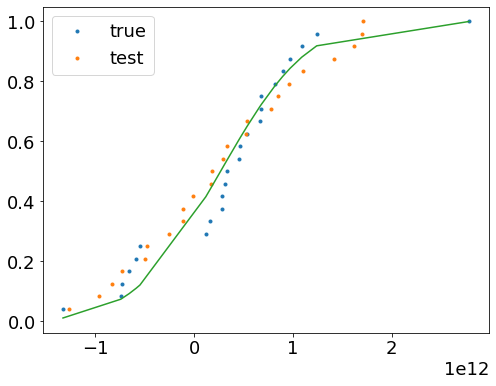

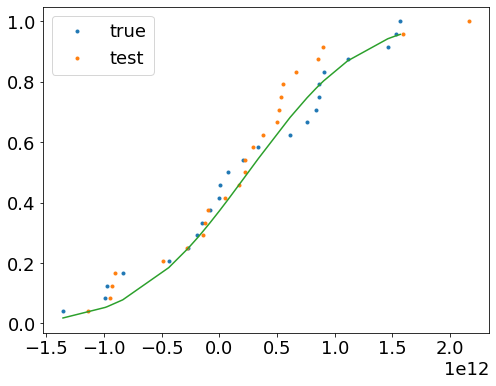

<Figure size 576x432 with 0 Axes>

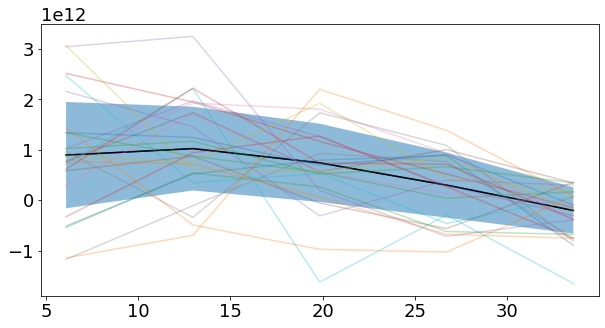

KS test for m = 2


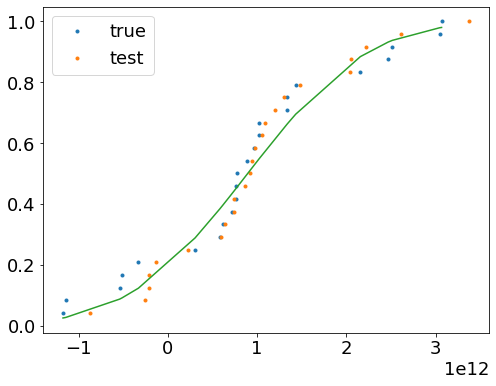

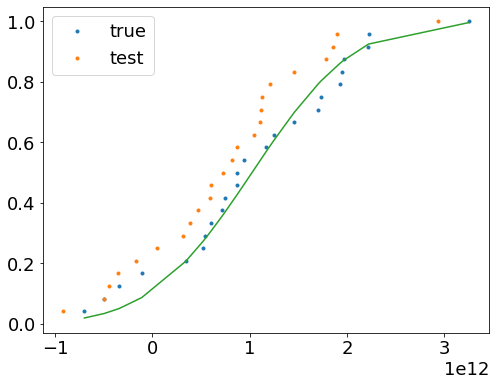

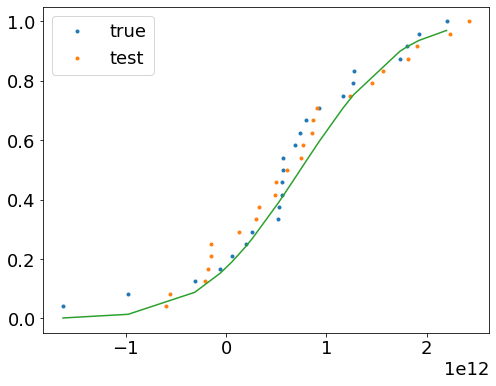

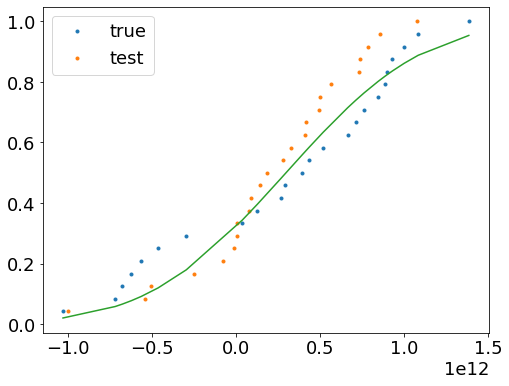

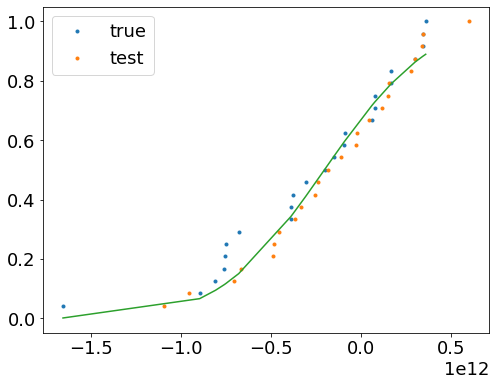

<Figure size 576x432 with 0 Axes>

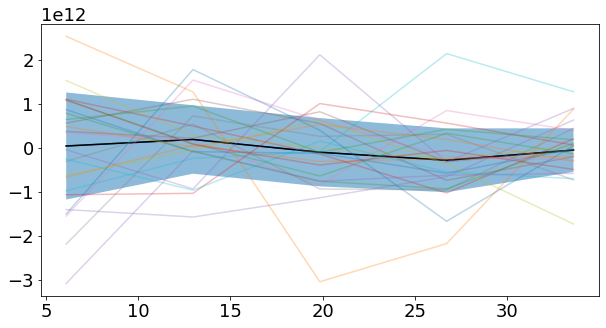

KS test for m = 3


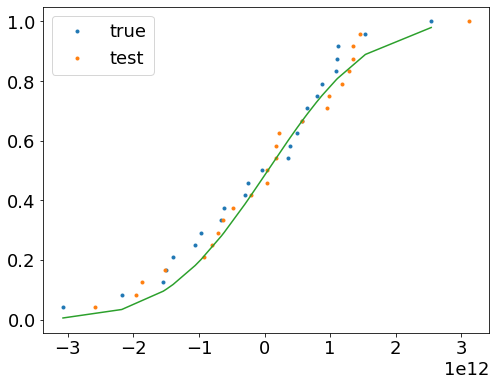

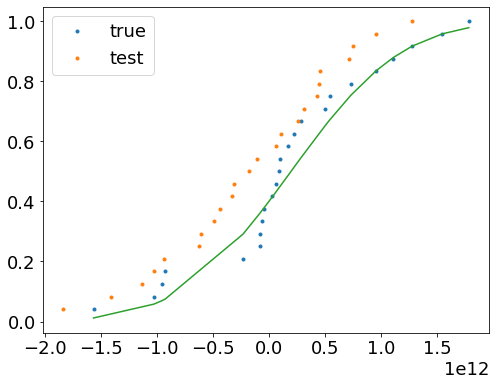

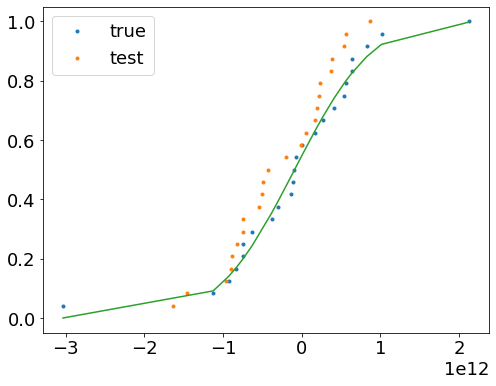

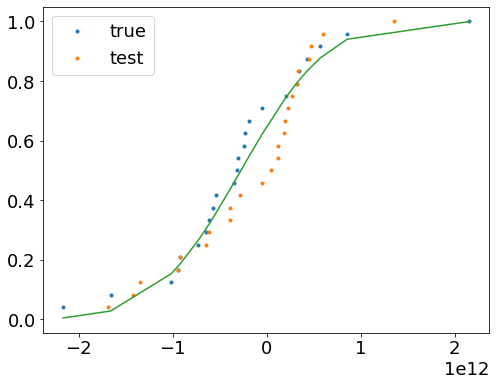

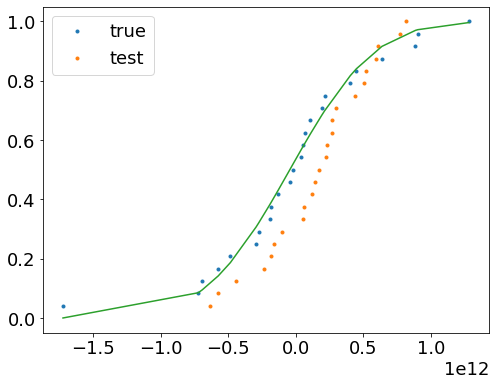

<Figure size 576x432 with 0 Axes>

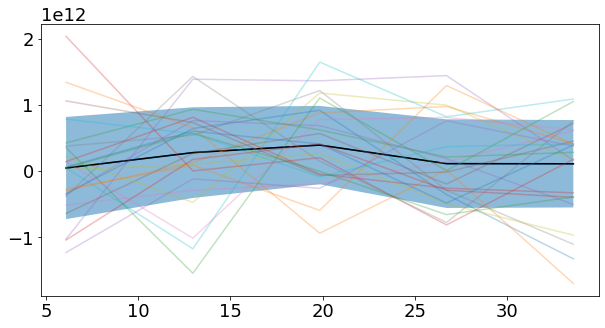

KS test for m = 4


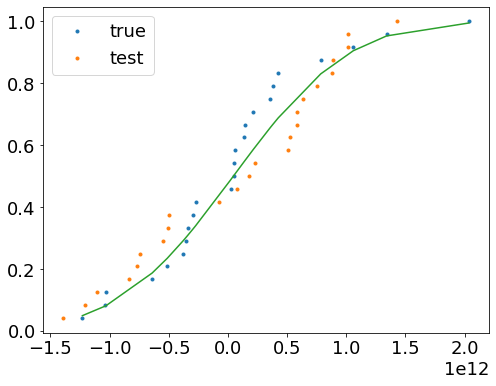

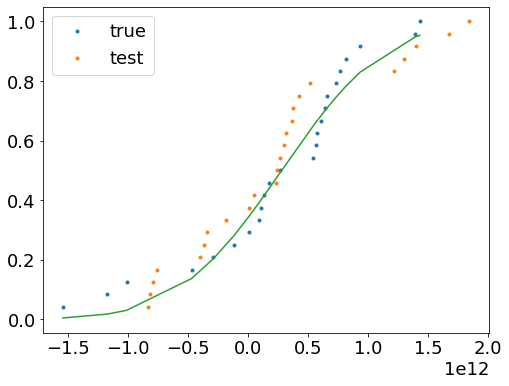

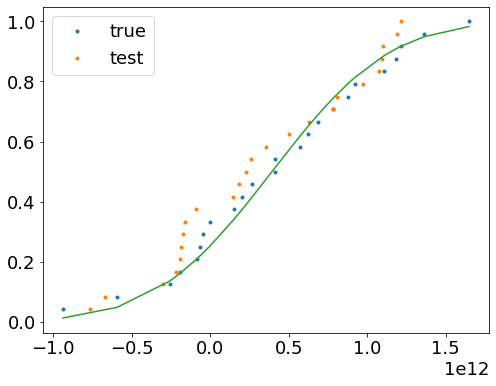

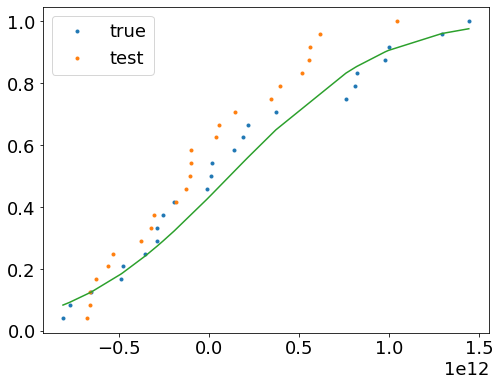

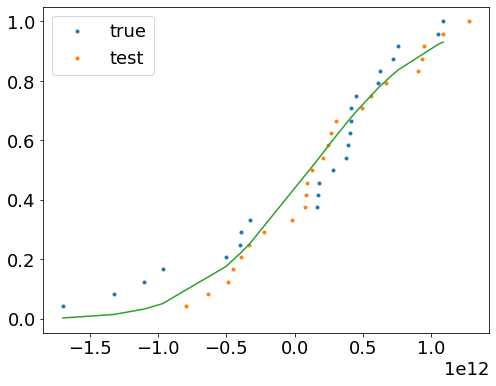

This many failures: 0
retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/kappa_bin4_redmapper_lambdagt20_combined_2693_3193Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_2643_3243Mpc_cc_24reg_m0to5_profiles.pkl
rvals [ 6.  12.8 19.6 26.4 33.2]


<Figure size 576x432 with 0 Axes>

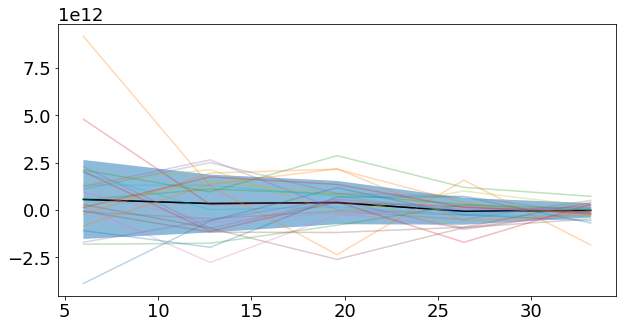

KS test for m = 0


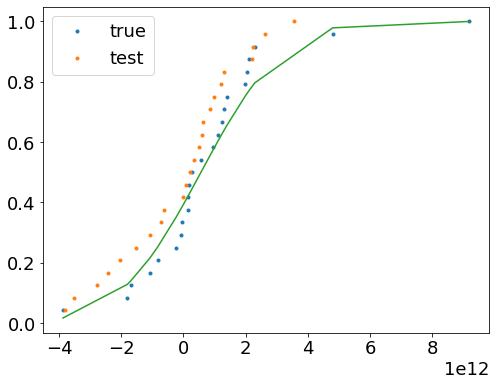

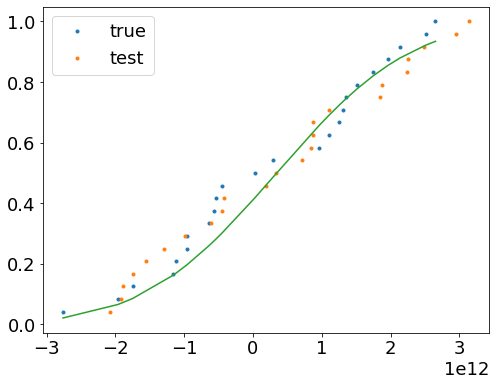

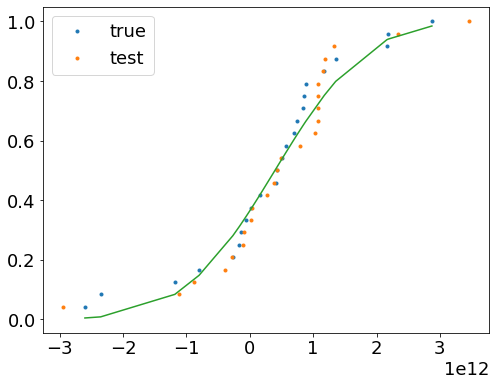

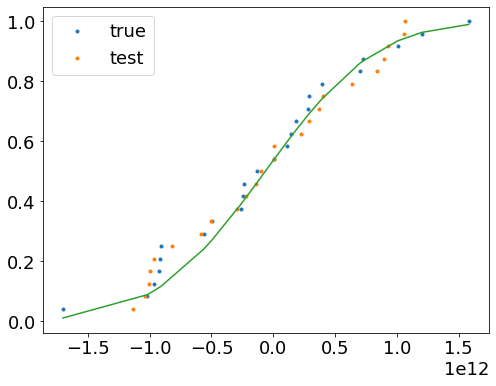

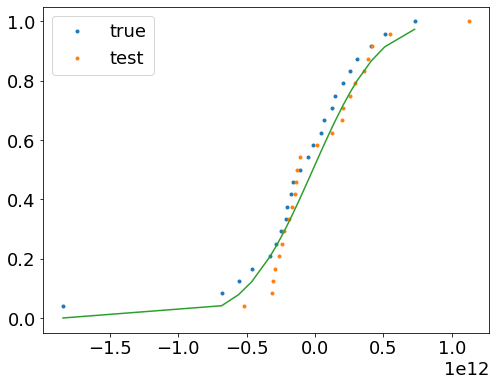

<Figure size 576x432 with 0 Axes>

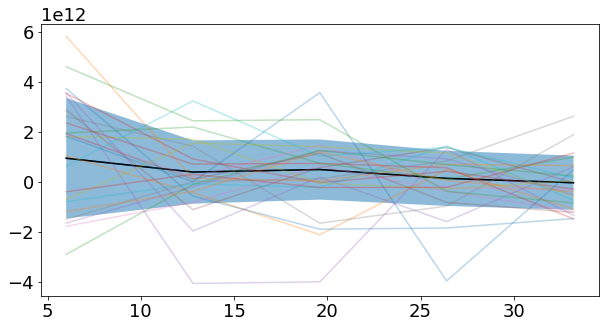

KS test for m = 1


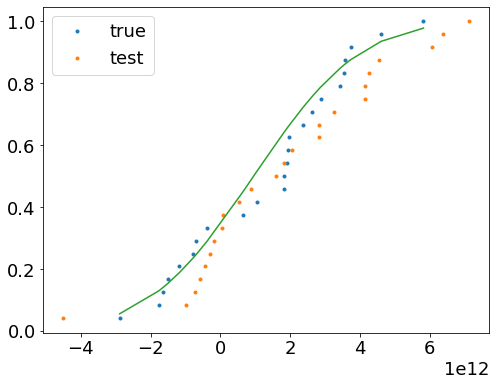

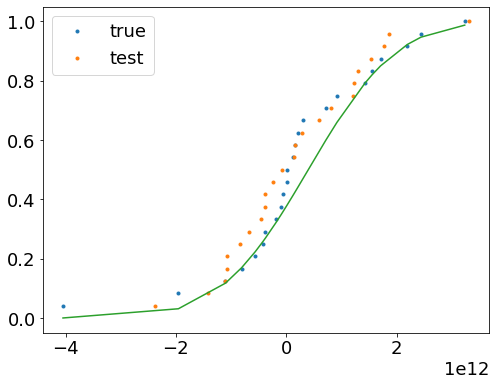

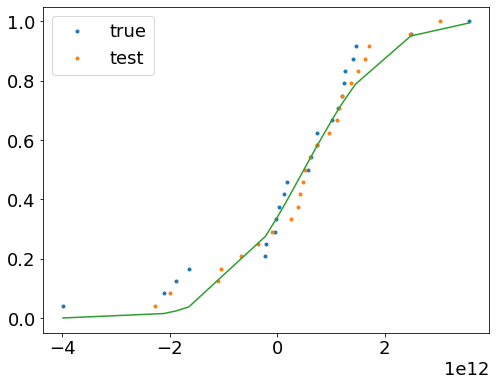

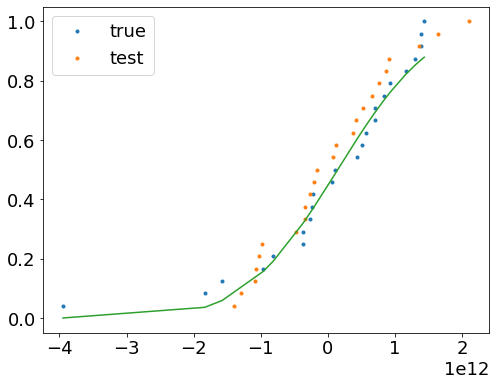

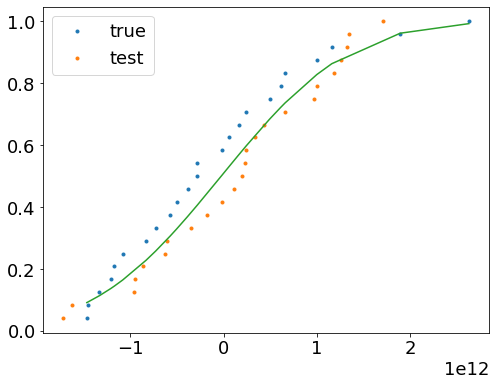

<Figure size 576x432 with 0 Axes>

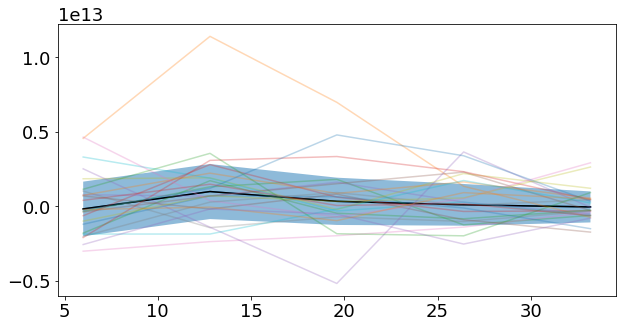

KS test for m = 2


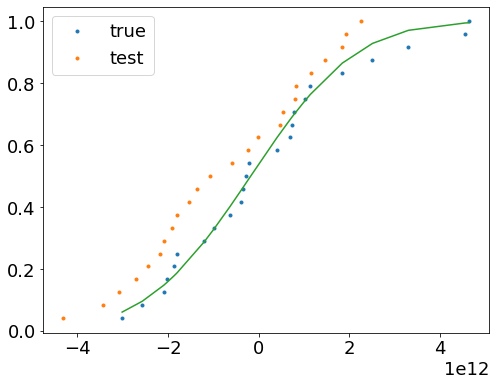

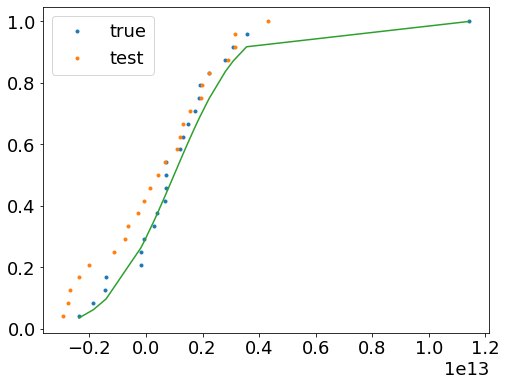

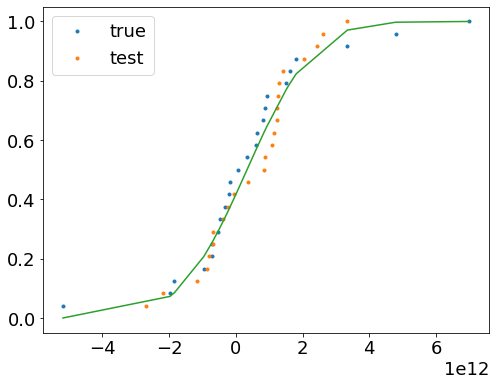

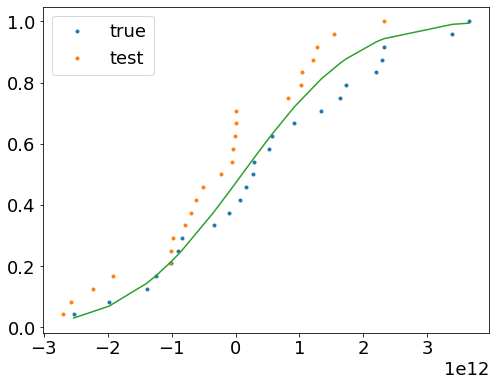

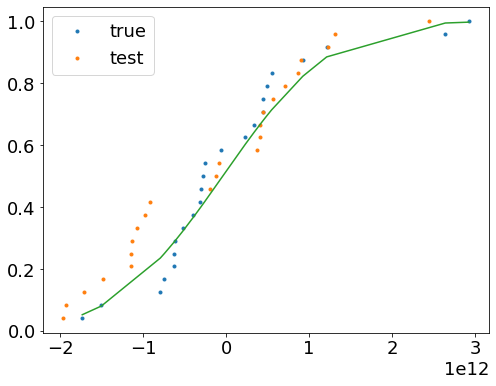

<Figure size 576x432 with 0 Axes>

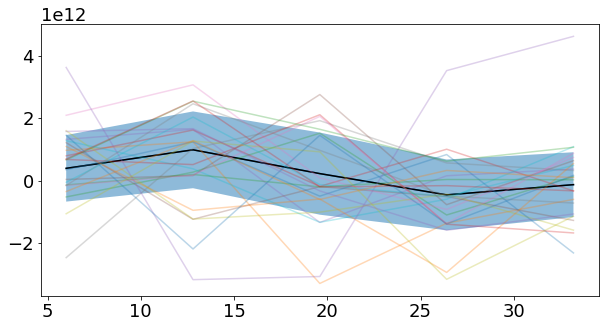

KS test for m = 3


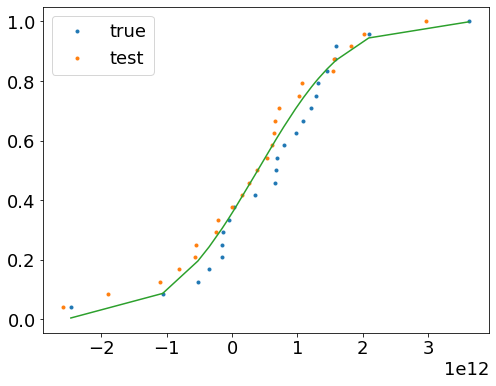

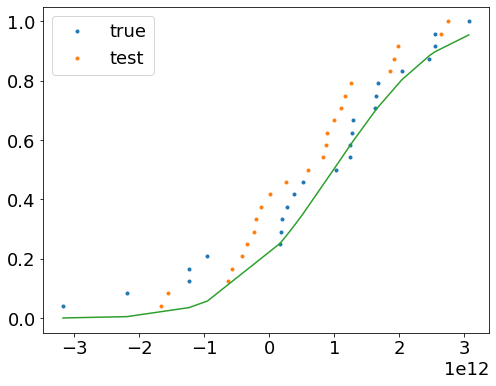

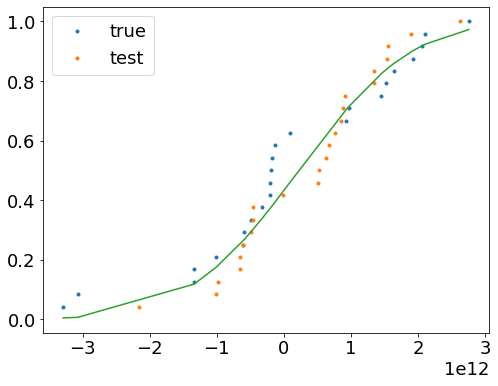

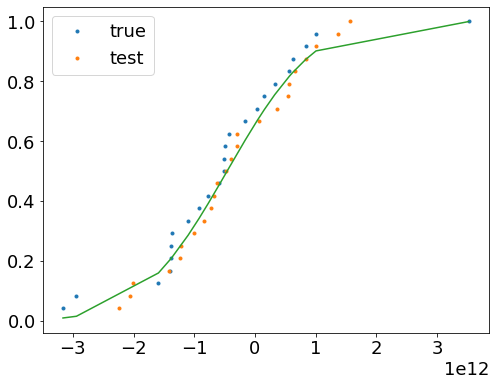

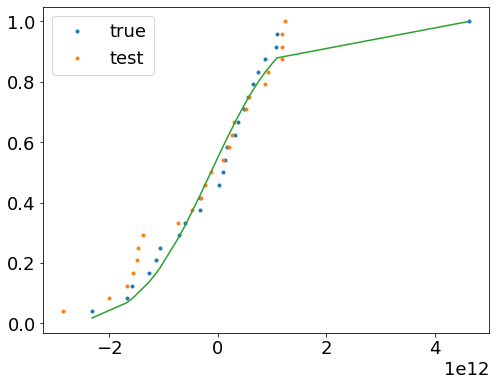

<Figure size 576x432 with 0 Axes>

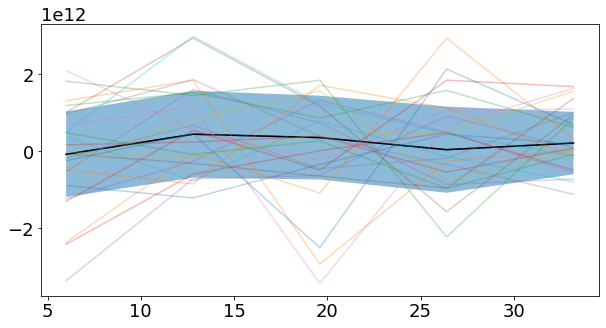

KS test for m = 4


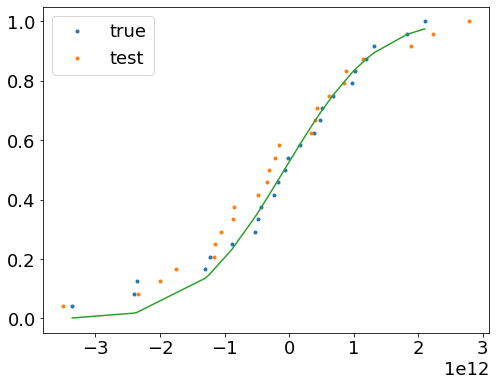

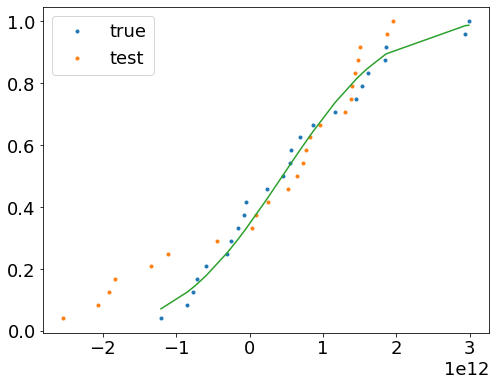

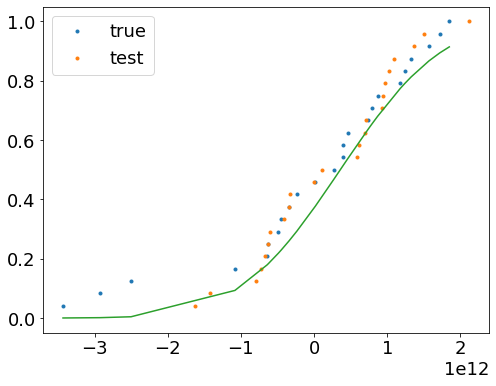

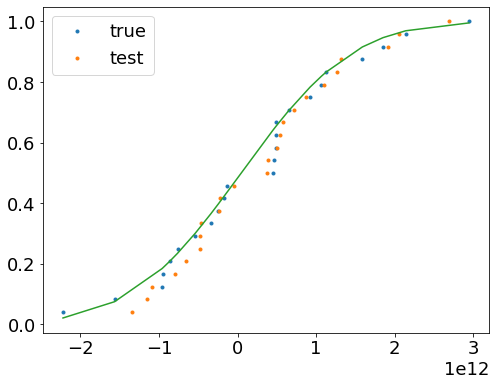

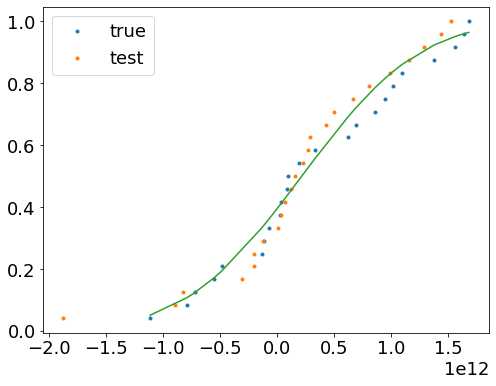

This many failures: 0


Text(0.05, 0.5, 'Lensing')

<Figure size 576x432 with 0 Axes>

In [89]:
# Making sure errors make sense
plot=True

fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

for c, cl_dbin in enumerate(dbins):
    
    cl_dlow, cl_dhi = cl_dbin[0], cl_dbin[1]
    dlow   = cl_dlow-50
    dhi    = cl_dhi+50
    zlow   = z_at_value(cosmo.comoving_distance, cl_dlow*u.Mpc)
    zhi    = z_at_value(cosmo.comoving_distance, cl_dhi*u.Mpc)
    mapstr = f'kappa_bin4'
    desk, (zlow,zhi) = cpp.retrieve_stack_info(dir, mapstr, pt_selection_str, cl_dbin, remove_r30=True)
    mlen = desk.profile_splits.shape[0]
    pval= np.zeros((len(desk.r_binned),mlen))
    ks = np.zeros((len(desk.r_binned),mlen))
    same = len(desk.r_binned) * [mlen*[False]]
    print(f"rvals {desk.r_binned}")
    for m in range(5):
        fig2, axs2 = plt.subplots(1, 1, figsize=(10, 5))
        axs2.plot(desk.r_binned, desk.avg_profiles_binned[m], label=f"m={m}")
        axs2.fill_between(desk.r_binned, desk.avg_profiles_binned[m]-desk.errors_binned[m]*np.sqrt(desk.Nsamples), desk.avg_profiles_binned[m]+desk.errors_binned[m]*np.sqrt(desk.Nsamples), alpha=0.5)
        # plot the mean
        axs2.plot(desk.r_binned, desk.avg_profiles_binned[m], label=f"m={m}", color='black')
        vals = np.zeros((len(desk.r_binned),desk.Nsamples))
        
        for i, reg in enumerate(range(desk.Nsamples)):

            vals[:,i] = desk.profile_splits_binned[m][reg]
            axs2.plot(desk.r_binned, desk.profile_splits_binned[m][reg], alpha=0.3)
        # show axs2
        plt.show()
        plt.clf()
        print(f"KS test for m = {m}")
        
        for r in range(len(desk.r_binned)):
            testvals = generate_normal_data(desk.avg_profiles_binned[m][r], desk.errors_binned[m][r]*np.sqrt(desk.Nsamples), len(vals[r,:]))
            # scattter the values with colors corresponding to the realization, rainbow colors
            cmap = plt.get_cmap('rainbow')
            # plt.scatter(np.full(len(vals[r,:]),desk.r_binned[r]), vals[r,:], alpha=.2, color=cmap(np.linspace(0,1,desk.Nsamples)))
            # plt.scatter(desk.r_binned[r], desk.avg_profiles_binned[m][r], color='black')
            # plt.scatter(np.full(len(vals[r,:]),desk.r_binned[r]+.5), testvals, color='red', alpha=.2)
            _, testp, _ = st.KStest_raderrs(testvals, desk.errors_binned[m][r]*np.sqrt(desk.Nsamples), desk.avg_profiles_binned[m][r])
            ks[r,m], pval[r,m], same[r][m] = st.KStest_raderrs(vals[r,:],desk.errors_binned[m][r]*np.sqrt(desk.Nsamples),desk.avg_profiles_binned[m][r])
        #     print(f"Distrib is same? {same[r][m]} for {desk.r_binned[r]}")
            testp_kappa.append(testp)
            #plot the ecdf vs cdf
            x = np.sort(vals[r,:])
            y = np.arange(1, len(x)+1) / len(x)
            xtest = np.sort(testvals)
            ytest = np.arange(1, len(xtest)+1) / len(xtest)
            plt.plot(x, y, marker='.', linestyle='none', label='true')
            plt.plot(xtest, ytest, marker='.', linestyle='none', label='test')
            plt.plot(x, sp.stats.norm.cdf(x, desk.avg_profiles_binned[m][r], desk.errors_binned[m][r]*np.sqrt(desk.Nsamples)))
            plt.legend()
            plt.show()
            plt.clf()
            
        # plt.show()
            
        # plt.clf()


    pval = np.transpose(np.asarray(pval))
    print("This many failures:", np.sum(pval<0.05))

    if plot:
        scmap = st.shiftedColorMap(plt.cm.RdBu, midpoint=0.05, name='shifted')
        pval_plot = axs[c].imshow(pval, cmap=scmap, vmin=0, vmax=1)
        axs[0].set_ylabel("m")
        # axs[c].set_title(f"z = {np.round(zlow.value,2)} - {np.round(zhi.value,2)}")
        # replace x ticks with r values
        axs[c].set_xticks(np.arange(0, len(desk.r_binned), 1), np.round(desk.r_binned,1))
        axs[c].set_xlabel("r [Mpc]")
    running_list.append(pval)
    kappa_only.append(pval)
        
# # add an axis for a colorbar
fig.subplots_adjust(right=0.8)
# add the space for a colorbar, keep it empty
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
# make sure this axes is empty
cbar_ax.axis('off')
# make space for label on the left of the plot
plt.subplots_adjust(left=0.09)
# add label on the left, rotated
fig.text(0.05, 0.5, 'Lensing', va='center', rotation='vertical', fontsize=20, fontweight='bold')
# plt.savefig("/home/mlokken/oriented_stacking/plots/paper2/ks_test_Gaussian_lensing.pdf")

# plt.show()

Text(0, 0.5, 'Counts')

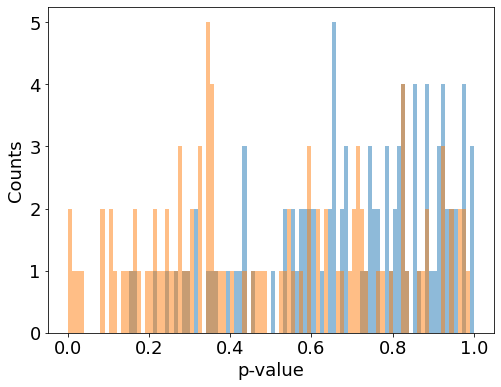

In [78]:
# plot the distribution of p for all three tracers
# should match a uniform distribution
plt.hist(np.asarray(kappa_only).flatten(), bins=100, range=(0,1), alpha=.5)
plt.hist(np.asarray(testp_kappa), bins=100, range=(0,1), alpha=.5)
plt.xlabel("p-value")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

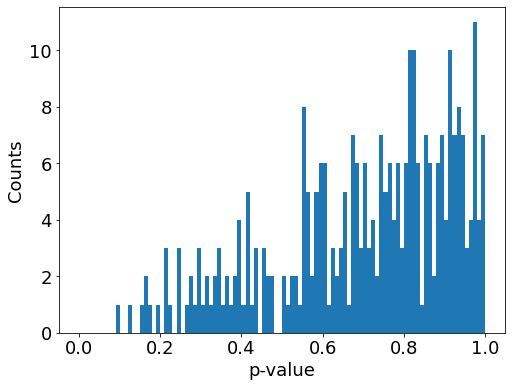

In [34]:
# plot the distribution of p for all three tracers
# should match a uniform distribution
plt.hist(np.asarray(running_list).flatten(), bins=100, range=(0,1))
plt.xlabel("p-value")
plt.ylabel("Counts")

[ 3.94896623  2.18092105  2.20507321  2.02398289  2.48944019  0.377989
  2.26147405  1.35232417  1.98248703  0.08125448  1.31103496  2.83866036
  1.52023353  1.70163538  1.45447153  1.67453199  3.16644113  2.12900173
  2.61870733 -0.67079198  2.07791731  1.52967021  1.29807159  2.95827506]
[ 2.66412939  3.26417718  1.45078368  2.03267527  1.88846504  2.22051784
  1.24434072  1.8832538   1.01013134  0.65823134  2.86271075  1.08733104
  1.54371339  1.14328874  2.30034766 -0.13612994  1.28763918  2.43355491
  3.28380341  2.20818013  2.85340122  1.66410808  1.78796634  1.61036253]
[0.19538923 2.03240201 2.32464395 0.858472   0.95961969 1.28068616
 2.40687987 3.43028037 2.138846   1.69143106 1.10378055 3.86049313
 1.4435102  3.40293407 1.59758202 2.07845308 1.66326246 1.0280941
 2.18444496 2.88120446 2.56381089 1.35795888 2.9181359  2.62725723]
[2.60777984 2.53140057 1.78199204 1.19425012 0.03694805 3.25749519
 3.39505388 3.04341642 2.85693194 1.5200361  0.36320429 2.78218935
 2.22160247 1.

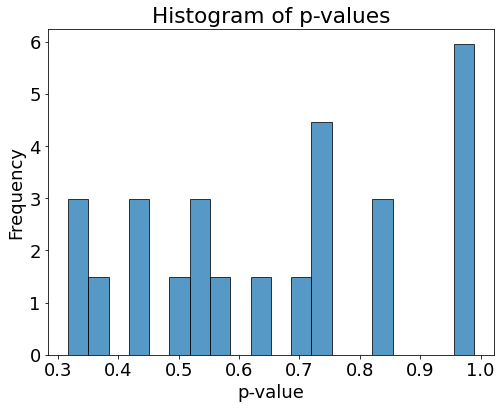

Uniformity test p-value: 0.027906542111363453


In [60]:
from scipy.stats import norm, ks_1samp, uniform

def generate_normal_data(mean, err, size):
    return np.random.normal(loc=mean, scale=err, size=size)

def check_uniformity_of_pvals(mean, err, n_samples=1000, sample_size=100, twosamp=False):
    pvals = []
    
    for _ in range(n_samples):
        # Generate a sample
        vals = generate_normal_data(mean, err, sample_size)
        print(vals)
        # Perform KS test
        _, pval, _ = st.KStest_raderrs(vals, err, mean, twosamp=twosamp)
        
        # Collect p-value
        pvals.append(pval)
    
    # Plot histogram of p-values
    plt.hist(pvals, bins=20, density=True, alpha=0.75, edgecolor='black')
    plt.xlabel('p-value')
    plt.ylabel('Frequency')
    plt.title('Histogram of p-values')
    plt.show()
    
    # Perform a uniformity test on the p-values
    _, uniform_pval = ks_1samp(pvals, uniform.cdf)
    print(f'Uniformity test p-value: {uniform_pval}')

# Example usage
check_uniformity_of_pvals(mean=2, err=1, n_samples=20, sample_size=24, twosamp=False)